# **Proyecto: Análisis de Emisiones de Gases Contaminantes (CO2Eq) Sistema Eléctrico Colombiano**

Realizado por: **Julián Andrés Santos Méndez**

email: ingjuliansantos@gmail.com


# **1. Entendimiento del Negocio**
---

## **1.1. Objetivos de negocio y situación actual**
---

Colombia es un país que se enorgullese de que el 69.25% de su energía eléctrica es generada con recursos renovables, los cuales constituyen una matriz energetica no fósil muy variada con diferentes fuentes, tales como la energía hidráulica, la biomasa, la energía eólica y la energía solar, sin embargo, el 98.5% de esa energía es generada con recursos hidráulicos a gran escala. 

Como consecuencia de esa depedencia a los grandes embalses, se tiene un sistema eléctrico que es muy sensible a fenomenos climáticos como el fenomeno del niño.

*Tabla 1. Capacidad efectiva neta del Sistema Interconectado Nacional (SIN) por tipo de recurso natural, Fuente: Informe 2019 XM S.A. E.S.P. [1]*

| Fuente de energía               | 2018 MW   | 2019 MW   | Participación (%) | Variación 2019 vs. 2018 |
|---------------------------------|-----------|-----------|-------------------|-------------------------|
| **Fuentes de energía No Renovable**
| Combustible fósil               | 5,308.14  | 5,369.74  | 30.75%            | 1.16%                   |
| Total No Renovable              | 5,308.14  | 5,369.74  | 30.75%            | 1.16%                   |
| **Fuentes de energía Renovable**    
| Biomasa                         | 139.60    | 139.60    | 0.80%             | 0.00%                   |
| Eólica                          | 18.42     | 18.42     | 0.11%             | 0.00%                   |
| Hidráulica                      | 11,836.57 | 11,916.61 | 68.24%            | 0.68%                   |
| Solar                           | 9.80      | 17.98     | 0.10%             | 83.43%                  |
| **Total Renovable**                 | **12,004.39** | **12,092.60** | **69.25%**           | **0.73%**                   |
| **Total general**                  | **17,312.53** | **17,462.34** | **100.00%**           | **0.87%**                   |

Para contrarrestar esa dependecia a la energía hidráulica, el país inició el proceso de incoporación de mas activos de generacion térmica con combustibles fósiles[2].

Es por esta razón que **el objetivo** principal de este proyecto es hacer un seguimiento de las emisiones de gases contaminantes que ha hecho el sistema eléctrico Colombiano y determinar su relacion con otras variables del sistema, para así tener una base con la cual analizar en el futuro las emisiones de los nuevos activos térmicos.



## **1.2. Metas del proyecto de análisis de datos**
---

Las metas del presente proyecto de analisis de datos son:

1. Comprender el comportamiento general de las emisiones de gases contaminantes del sistema interconectado nacional.
2. Determinar la correlacion de la cantidad de emisiones a otras variables del sistema de generación eléctrica.
3. Comprender la influencia de los fenomenos climáticos en las emisiones del SIN.
4. Encontrar la influencia del consumo de combustible en el precio de la eléctricidad.

## **1.3. Planeación del proyecto de análisis de datos**
---

A continuacion se presenta el plan para la ejecución del presente proyecto:

1. **Definición de las fuentes de información.**
  * *Application Programming Interface* tipo REST (API) de XM S.A. E.S.P.
  * *Web scraping* del informe diario de operación (IDO) de XM S.A. E.S.P.
  * Se solicitaron, al *servicio al ciudadano* de XM S.A. E.S.P., los datos de ubicación de las centrales de generacion del Sistema Eléctrico Colombiano.
2. **Integración: Consolidación de los datasets adquiridos en un solo *DataFrame* con todas las *features*.**
3. **Caracterización de los datos**
  * Verificación del tamaño y forma del DataFrame consolidado
  * Verificación de los tipos de dato.
  * Verificación de las unidades de medida de cada *feature*.
4. **Preparación de los datos**
  * Conversión de los *features* a los tipos de dato adecuados.
  * Busqueda de registros vacíos.
  * Reemplazo de registros vacios por datos válidos, con la justificación adecuada.
  * Caracterización de los datos con estadística descriptiva.
  * Visualización de medidas estadísticas.
  * Conversión de las unidades de medida con numeros grandes a unidades con numeros mas pequeños, sin que se salgan del dominio del sistema internacional de unidades.
  * Cálculo de nuevas *features* que ayuden en el proceso de union (join) de los datasets.
  * Selección de los *features* definitivos que se usarán en el análisis.
5. **Análisis de Datos**
  * Determinación de la correlación de los features.
  * Visualización del *Pair Plot* para ver graficamente como cada uno de los features impacta las emisiones de gases contaminantes.
  * Con el apoyo de las visualizaciones contra el tiempo:
    * Buscar de tendencias (trend) en los features respecto al tiempo usando el grafico Feature vs. Tiempo con énfasis en las emisiones de gases contaminantes.
    * Buscar de comportammientos estacionales (seasonality) de las variables respecto al tiempo usando el grafico Feature vs. Tiempo con énfasis en las emisiones de gases contaminantes.
    * Explicar el impacto del clima en las emisiones del SIN.
    * Explicar el impacto del consumo de combustible en el precio bolsa de la eléctricidad.
6. **Visualización de datos**
  * Construcción un mapa coroplético de Colombia indicando los departamentos con mas emsiones de gases contaminantes debidas al Sistema Eléctrico Nacional.

## **1.4. Herramientas del proyecto**
---

En este proyecto fueron usadas las siguientes Librerias:
1. Pandas
2. Matplotlib
3. Seaborn

Tambien se usaron los siguientes entornos de desarrollo:
1. Colab
2. Jupyter Notebooks (Local)



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

plt.rcParams['figure.dpi'] = 90   
sns.set_theme('notebook')
sns.color_palette("Spectral", as_cmap=True)

## **1.5. Definiciones importantes**
---

*   **XM S.A. E.S.P.**: Es una empresa que pertenece al grupo ISA, se encarga de la administración del mercado mayorista de electricidad de Colombia, también opera el Sistema Interconectado Nacional, integrando así, sus recursos de generación, interconexión y transmisión de energía eléctrica.[3]  
*   **Emisiones Contaminantes**: Es la descarga de fluidos gaseosos, puros o con sustancias en suspensión que sean residuos de la actividad humana o de la naturaleza y que causan efectos adversos en la atmósfera de la tierra, como lo es el efecto invernadero o lluvia ácida.
* $CO_{2}$: Dioxido de carbon, gas contaminante de la atmosfera el cual produce efecto invernadero.
* $CH_{4}$: Metano, gas contaminante de la atmosfera, el cual produce efecto invernadero con un potencial de calentamiento global 21 veces mayor que el $CO_{2}$.
* $N_{2}O$: Oxido Nitroso, gas contaminante de la atmosfera, el cual produce efecto invernadero con un potencial de calentamiento global 310 veces mayor que el $CO_{2}$.
* $CO_{2 eq}$: Emisiones de un gas equivalentes a $CO_{2}$, se calcula con la siguiente formula $Ton CO_{2 eq} = (TonGas) (GWP)$, donde GWP es el potencial de calentamiento global.




# **2. Entendimiento de los datos**
---

## 2.0. Definición de las variables
---

A cotinuacion se hace una definición del siginificado de cada una de las variables de operación del Sistema Interconectado Nacional:
* **Generación**: Es la cantidad de energía eléctrica generada por el SIN.
* **Demanda**: Es la cantidad de energía eléctrica demandada por los consumidores del SIN.
* **Disponibilidad Real**: Es la capacidad instalada, activos listos para generar, que esta en capacidad de comenzar a generar energía de inmediato.
* **Aportes de Energía**: Son los aportes hídricos que llegan llegan al SIN por medio de los embalses que lo componen, en lugar de caudal, se presentan en unidades de energía, lo que dice directamente cuanta eléctricidad es capaza de generar esa cantidad de agua.
* **Volumen Util**: Es el volumen útil de agua que tienen los embalses del SIN, es decir, con capacidad de generar energía, al igual que los aportes, se mide en energía.
* **Consumo de Combustible**: Es la cantidad de combustible fósil usado por el SIN.
* **Precio Bolsa**: El precio de la bolsa mayorista de energía del SIN.
* **Emisiones**: Para cada uno de los gases contaminantes, representa la cantidad en toneladas de ese gas, que descarga el sistema a la atmósfera. Solo incluye los gases generados directamente por las plantas al quemar combustible para generar.  

## **2.1. Adquisición e integración de datos**
---

Los datos fueron adquiridos de las siguientes fuentes:

### ***2.1.1 Application Programming Interface (API) de XM S.A. E.S.P.***
---

En el 2020, XM puso a disposición del público en general, su REST API para facilitar la consulta de datos del SIN.

Para hacer aún más fácil la consulta con la API, desarrollaron un modulo llamado *pydataxm.py* donde se permite hacer las consultadas a la API de una forma mas directa y sencilla, retornando un *DataFrame* de Pandas con los datos de cada variable consultada.

Para faciltar la integración del modulo *pydataxm.py*, se construyó un Notebook *.ipynb independiente con Jupyter Notebook instalado de manera local con Anaconda, este Notebook se adjunta en la entrega con el nombre de: **Adquisición de Datos API XM.ipynb**

A continuacion se leen los CSVs obtenidos de la API de XM:





In [ ]:
df_emisionesCO2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Diplomado Machine Learning and Data Science/Proyecto Final/data/emisionesCO2.csv')
df_emisionesCO2.head(5)

,Unnamed: 0,Id,Values_Name,Values_code,Values_Hour01,Values_Hour02,Values_Hour03,Values_Hour04,Values_Hour05,Values_Hour06,Values_Hour07,Values_Hour08,Values_Hour09,Values_Hour10,Values_Hour11,Values_Hour12,Values_Hour13,Values_Hour14,Values_Hour15,Values_Hour16,Values_Hour17,Values_Hour18,Values_Hour19,Values_Hour20,Values_Hour21,Values_Hour22,Values_Hour23,Values_Hour24,Date
0,0,RecursoComb,MRL1,GAS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.80,53.47,74.39,67.90,79.12,103.14,104.08,67.26,68.14,96.07,68.78,66.97,50.78,NaN,NaN,2013-10-01
1,1,RecursoComb,PPA1,CARBON,37.26,37.24,37.14,37.21,37.01,37.61,37.34,36.14,36.23,36.91,37.41,37.29,37.15,36.73,36.82,36.77,37.24,36.84,36.67,36.67,37.11,37.05,36.63,37.27,2013-10-01
2,2,RecursoComb,PPA2,CARBON,84.68,84.30,85.39,85.26,85.37,84.19,84.32,85.31,84.99,85.60,85.28,85.62,85.34,86.40,85.32,84.90,84.50,84.41,84.21,83.90,84.37,85.24,84.56,85.02,2013-10-01
3,3,RecursoComb,PPA4,CARBON,121.88,111.02,98.90,80.73,63.19,45.15,20.35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-10-01
4,4,RecursoComb,PRG1,GAS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.90,13.80,21.00,26.05,26.38,26.38,26.38,14.59,NaN,2013-10-01


In [ ]:
df_emisionesCH4 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Diplomado Machine Learning and Data Science/Proyecto Final/data/emisionesCH4.csv')
df_emisionesCH4.head(5)

,Unnamed: 0,Id,Values_Name,Values_code,Values_Hour01,Values_Hour02,Values_Hour03,Values_Hour04,Values_Hour05,Values_Hour06,Values_Hour07,Values_Hour08,Values_Hour09,Values_Hour10,Values_Hour11,Values_Hour12,Values_Hour13,Values_Hour14,Values_Hour15,Values_Hour16,Values_Hour17,Values_Hour18,Values_Hour19,Values_Hour20,Values_Hour21,Values_Hour22,Values_Hour23,Values_Hour24,Date
0,0,RecursoComb,2S6S,CARBON,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.811700e-07,2018-01-01
1,1,RecursoComb,2S8G,CARBON,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.552300e-08,NaN,NaN,0.000014,0.000015,0.000015,0.000015,0.000014,0.000015,0.000015,0.000015,0.000015,0.000015,0.000014,0.000014,0.000015,1.608984e-05,2018-01-01
2,2,RecursoComb,2S8I,GAS,6.260278e-05,0.000063,0.000059,0.000058,0.000056,0.000056,0.000061,6.260278e-05,0.000059,0.000056,0.000059,0.000058,0.000056,0.000051,0.000051,0.000048,0.000053,0.000048,0.000051,0.000052,0.000049,0.000048,0.000042,4.256989e-05,2018-01-01
3,3,RecursoComb,2S8S,BIOGAS,9.719082e-06,0.000010,0.000010,0.000010,0.000010,0.000008,0.000007,9.943701e-06,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,9.898345e-06,2018-01-01
4,4,RecursoComb,2S9Q,BIOGAS,1.403870e-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-01


In [ ]:
df_emisionesN2O = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Diplomado Machine Learning and Data Science/Proyecto Final/data/emisionesN2O.csv')
df_emisionesN2O.head(5)

,Unnamed: 0,Id,Values_Name,Values_code,Values_Hour01,Values_Hour02,Values_Hour03,Values_Hour04,Values_Hour05,Values_Hour06,Values_Hour07,Values_Hour08,Values_Hour09,Values_Hour10,Values_Hour11,Values_Hour12,Values_Hour13,Values_Hour14,Values_Hour15,Values_Hour16,Values_Hour17,Values_Hour18,Values_Hour19,Values_Hour20,Values_Hour21,Values_Hour22,Values_Hour23,Values_Hour24,Date
0,0,RecursoComb,2S6S,CARBON,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.219830e-07,2018-01-01
1,1,RecursoComb,2S8G,CARBON,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.831500e-08,NaN,NaN,2.104853e-05,2.178405e-05,2.215940e-05,2.285841e-05,2.157033e-05,2.180128e-05,2.201022e-05,2.250316e-05,2.260257e-05,2.232813e-05,2.148336e-05,2.175082e-05,2.283762e-05,2.414239e-05,2018-01-01
2,2,RecursoComb,2S8I,GAS,6.289948e-06,6.289948e-06,5.912551e-06,5.786752e-06,5.598054e-06,5.660953e-06,6.164149e-06,6.289948e-06,5.912551e-06,5.660953e-06,5.912551e-06,5.849651e-06,5.660953e-06,5.094858e-06,5.094858e-06,4.843260e-06,5.283556e-06,4.843260e-06,5.157757e-06,5.220657e-06,4.906159e-06,4.780360e-06,4.214265e-06,4.277165e-06,2018-01-01
3,3,RecursoComb,2S8S,BIOGAS,9.765140e-07,9.773820e-07,9.775990e-07,9.780330e-07,9.780330e-07,8.137620e-07,6.666340e-07,9.990830e-07,9.990830e-07,9.997340e-07,9.995170e-07,9.999510e-07,9.988660e-07,9.999510e-07,9.982150e-07,9.973470e-07,9.964790e-07,9.958280e-07,9.953940e-07,9.945260e-07,9.940920e-07,9.938750e-07,9.951770e-07,9.945260e-07,2018-01-01
4,4,RecursoComb,2S9Q,BIOGAS,1.410500e-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-01


In [ ]:
df_generacion = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Diplomado Machine Learning and Data Science/Proyecto Final/data/generacion.csv')
df_generacion.head(5)

,Unnamed: 0,Id,Values_code,Values_Hour01,Values_Hour02,Values_Hour03,Values_Hour04,Values_Hour05,Values_Hour06,Values_Hour07,Values_Hour08,Values_Hour09,Values_Hour10,Values_Hour11,Values_Hour12,Values_Hour13,Values_Hour14,Values_Hour15,Values_Hour16,Values_Hour17,Values_Hour18,Values_Hour19,Values_Hour20,Values_Hour21,Values_Hour22,Values_Hour23,Values_Hour24,Date
0,0,Sistema,Sistema,5652791.52,5434676.04,5317141.75,5276928.62,5546540.88,6201108.04,6379259.59,6709058.07,7184259.55,7489376.38,7831492.47,8128518.02,7890811.45,7849727.43,7986292.27,8057228.31,8065553.07,8123746.36,8994497.99,9013217.17,8537423.32,7867980.39,7017838.98,6137747.72,2013-10-01
1,1,Sistema,Sistema,5677851.52,5477764.86,5378952.23,5363349.58,5612340.88,6254438.19,6436153.78,6781485.33,7326329.38,7598518.11,7905521.61,8332628.63,8096414.94,8098192.16,8271824.91,8295899.55,8219480.02,8354390.63,9257396.62,9228358.81,8765813.28,8126048.30,7315892.17,6351571.17,2013-10-02
2,2,Sistema,Sistema,5924722.52,5723195.66,5583457.41,5576196.96,5814280.41,6446987.43,6605138.76,6999708.38,7470373.32,7807337.24,8194426.67,8550757.60,8397902.88,8375696.90,8446102.22,8424219.15,8309044.38,8326148.78,9257384.87,9189614.04,8691094.41,8059333.20,7236136.29,6398200.98,2013-10-03
3,3,Sistema,Sistema,5875616.20,5591186.74,5488837.22,5504456.12,5722966.69,6306930.44,6519761.99,6858336.16,7303895.32,7524496.88,7851274.30,8122580.13,7906954.43,7842825.30,7983446.93,7995739.24,7939393.18,8133314.95,8950259.06,8856754.85,8265433.53,7679348.57,6937681.68,6290652.12,2013-10-04
4,4,Sistema,Sistema,5800445.58,5529161.83,5372898.10,5339722.55,5454094.02,5623988.94,5851244.67,6437923.62,7051874.52,7454591.91,7718299.47,7892357.19,7786000.80,7551367.69,7325527.40,7215059.26,7087162.94,7163605.70,8311249.84,8388383.36,7997181.50,7494951.82,6832508.25,6239010.18,2013-10-05


In [ ]:
df_demanda = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Diplomado Machine Learning and Data Science/Proyecto Final/data/demanda.csv')
df_demanda.head(5)

,Unnamed: 0,Id,Value,Date
0,0,Sistema,1.706536e+08,2013-10-01
1,1,Sistema,1.731401e+08,2013-10-02
2,2,Sistema,1.778658e+08,2013-10-03
3,3,Sistema,1.718383e+08,2013-10-04
4,4,Sistema,1.653083e+08,2013-10-05


In [ ]:
df_aportes_energia = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Diplomado Machine Learning and Data Science/Proyecto Final/data/aportes_energia.csv')
df_aportes_energia.head(5)

,Unnamed: 0,Id,Value,Date
0,0,Sistema,142710800,2013-10-01
1,1,Sistema,126028500,2013-10-02
2,2,Sistema,153994800,2013-10-03
3,3,Sistema,341075900,2013-10-04
4,4,Sistema,167324800,2013-10-05


In [ ]:
df_volumen_util_energia = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Diplomado Machine Learning and Data Science/Proyecto Final/data/volumen_util_energia.csv')
df_volumen_util_energia.head(5)

,Unnamed: 0,Id,Value,Date
0,0,Sistema,9.520172e+09,2013-10-01
1,1,Sistema,9.480618e+09,2013-10-02
2,2,Sistema,9.488428e+09,2013-10-03
3,3,Sistema,9.685847e+09,2013-10-04
4,4,Sistema,9.726045e+09,2013-10-05


In [ ]:
df_consumo_combustible = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Diplomado Machine Learning and Data Science/Proyecto Final/data/consumo_combustible.csv')
df_consumo_combustible.head(5)

,Unnamed: 0,Id,Values_Name,Values_code,Values_Hour01,Values_Hour02,Values_Hour03,Values_Hour04,Values_Hour05,Values_Hour06,Values_Hour07,Values_Hour08,Values_Hour09,Values_Hour10,Values_Hour11,Values_Hour12,Values_Hour13,Values_Hour14,Values_Hour15,Values_Hour16,Values_Hour17,Values_Hour18,Values_Hour19,Values_Hour20,Values_Hour21,Values_Hour22,Values_Hour23,Values_Hour24,Date
0,0,Recurso,CARBON,PPA1,400.69,400.44,399.43,400.14,398.05,404.50,401.57,388.64,389.64,396.88,402.32,401.06,399.56,394.95,396.00,395.37,400.44,396.21,394.37,394.33,399.06,398.39,393.95,400.81,2013-10-01
1,1,Recurso,CARBON,PPA2,910.63,906.56,918.27,916.87,918.06,905.37,906.77,917.36,913.92,920.51,917.08,920.72,917.78,929.14,917.57,913.01,908.74,907.75,905.58,902.21,907.26,916.66,909.37,914.27,2013-10-01
2,2,Recurso,CARBON,PPA4,1310.63,1193.90,1063.58,868.10,679.56,485.56,218.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-10-01
3,3,Recurso,CARBON,TGJ1,835.87,799.12,801.48,801.74,801.48,801.74,798.59,790.72,781.53,781.53,805.68,808.57,808.57,808.57,808.83,808.83,807.78,846.63,1328.89,1347.79,1261.68,1250.66,1174.00,1159.82,2013-10-01
4,4,Recurso,CARBON,TGJ2,761.31,761.31,761.31,761.31,761.31,761.31,761.31,761.31,787.57,787.57,1023.84,1443.87,1443.87,918.83,1076.34,787.57,1050.09,1417.62,1417.62,1470.12,1417.62,1286.36,367.53,NaN,2013-10-01


In [ ]:
df_precio_bolsa = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Diplomado Machine Learning and Data Science/Proyecto Final/data/precio_bolsa.csv')
df_precio_bolsa.head(5)

,Unnamed: 0,Id,Values_code,Values_Hour01,Values_Hour02,Values_Hour03,Values_Hour04,Values_Hour05,Values_Hour06,Values_Hour07,Values_Hour08,Values_Hour09,Values_Hour10,Values_Hour11,Values_Hour12,Values_Hour13,Values_Hour14,Values_Hour15,Values_Hour16,Values_Hour17,Values_Hour18,Values_Hour19,Values_Hour20,Values_Hour21,Values_Hour22,Values_Hour23,Values_Hour24,Date
0,0,Sistema,Sistema,136.24,136.24,136.24,136.24,136.24,139.73,139.73,149.24,149.24,149.24,154.24,154.24,149.24,149.24,154.24,154.24,149.24,149.24,164.24,164.24,154.24,149.24,149.24,139.73,2013-10-01
1,1,Sistema,Sistema,141.55,141.55,141.55,141.55,142.45,142.45,142.45,142.45,145.34,151.45,151.45,151.58,151.45,151.45,151.58,151.45,151.45,151.45,170.77,170.77,151.58,151.45,142.45,142.45,2013-10-02
2,2,Sistema,Sistema,151.21,151.21,151.21,151.21,151.21,155.99,155.99,155.99,162.01,202.01,203.01,202.01,162.01,189.61,189.61,189.61,162.01,162.01,189.61,189.61,202.01,162.01,155.99,151.21,2013-10-03
3,3,Sistema,Sistema,154.42,154.42,154.42,154.42,154.42,154.42,156.30,156.30,156.30,157.42,157.42,157.42,157.42,157.42,157.42,157.42,157.42,157.42,157.42,157.42,157.42,157.42,156.30,154.42,2013-10-04
4,4,Sistema,Sistema,150.98,159.88,125.88,125.88,125.88,150.98,150.98,150.98,159.88,159.88,159.88,159.88,159.88,159.88,159.88,159.88,159.88,159.88,159.88,159.88,159.88,159.88,159.88,150.98,2013-10-05


In [ ]:
df_listado_recursos = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Diplomado Machine Learning and Data Science/Proyecto Final/data/listado_recursos.csv')
df_listado_recursos.head(5)

,Unnamed: 0,Id,Code,Name,Type,Disp,RecType,CompanyCode,EnerSource,OperStartDate,CapaValue,Date
0,0,Recurso,2QBW,EL POPAL,HIDRAULICA,NO DESPACHADO CENTRALMENTE,FILO DE AGUA,LCSG,AGUA,2014-03-31T00:00:00,19900.0,2019-10-01
1,1,Recurso,2QEK,SALTO II,HIDRAULICA,DESPACHADO CENTRALMENTE,FILO DE AGUA,ENDG,AGUA,2014-06-25T00:00:00,35000.0,2019-10-01
2,2,Recurso,2QRL,LA REBUSCA,HIDRAULICA,NO DESPACHADO CENTRALMENTE,NORMAL,HZEG,AGUA,2014-07-24T00:00:00,700.0,2019-10-01
3,3,Recurso,2QV2,BAJO TULUA,HIDRAULICA,NO DESPACHADO CENTRALMENTE,NORMAL,EPSG,AGUA,2015-01-30T00:00:00,19900.0,2019-10-01
4,4,Recurso,2R22,LAGUNETA,HIDRAULICA,NO DESPACHADO CENTRALMENTE,NORMAL,ENDG,AGUA,2014-12-17T00:00:00,18000.0,2019-10-01


### ***2.1.2. Web Scraping del Informe Diario de Operacion (IDO) de XM S.A. E.S.P.***
---



En proyecto personal del año 2020, se construyo un web scraper de todas las variables reportadas en el IDO: http://ido.xm.com.co/ido/SitePages/ido.aspx 

Cuando se construyó este extractor de datos de la web la REST API de XM aun no estaba disponible.

El scraper fue construido en dos módulos:
* *xm_scraper.py*: Donde se extraen las tablas HTML de los datos usando Selenium.
* *xm_transformer.py*: Donde se toman las tablas en HTML, se transforman usando Pandas y se almacenan en una base de dats MySQL.

Los archivos de este proyecto personal los puse de a su disposicion en el siguiente repositorio: https://github.com/jasantosm/powerco_scraper_historical 

De este dataset *scrapeado* solo se tomara la variable ***disponibilidad real*** la cual no esta disponible en las variables dispuestas por XM en su REST API. Esta variable fue puesta en un CSV aparte para los propositos de este proyecto.


In [ ]:
df_disponibilidad_real = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Diplomado Machine Learning and Data Science/Proyecto Final/data/disponibilidad_real.csv')
df_disponibilidad_real

,Unnamed: 0,date,disponibilidad_real
0,0,'2013-10-01 00:00:00',11835.32
1,1,'2013-10-02 00:00:00',11800.91
2,2,'2013-10-03 00:00:00',11867.83
3,3,'2013-10-04 00:00:00',12187.11
4,4,'2013-10-05 00:00:00',12007.72
...,...,...,...
2640,2640,2020-12-31 14:00:53.240952,14261.2
2641,2641,2021-01-01 14:00:29.887588,14049.69
2642,2642,2021-01-02 14:00:39.356750,13985.05
2643,2643,2021-01-03 14:00:31.126750,14090.82


### ***2.1.3. Solicitud de datos al correo de servicio al ciudadano XM S.A. E.S.P***
---



Dentro de los datos suministrados por XM en su API, no se encuentra la ubicación geográfica de los recursos de generación, su latitud y longitud. 

Por esta razón, se solicitó esta información al correo de servicio al ciudadano de XM: info@xm.com.co

En la respuesta fue suministrado un archivo de Excel con el listado de recursos y el municipio y departamento donde se ubican, si bien no entregaron las coordenadas, la informacion de municipio-departamento es de calidad, y cumple con el proposito de ubicar geográficamente las centrales.

In [ ]:
df_ubicacion_plantas = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Diplomado Machine Learning and Data Science/Proyecto Final/data/ubicación_plantas_unidades.xlsx')
df_ubicacion_plantas

,Identificador,Nombre de la Planta o Unidad,Municipio,Departamento
0,Sol0003,AGPE NAFERTEX 1,Medellin,Antioquia
1,Unh0491,ALEJANDRÍA 1,Alejandria,Antioquia
2,Unh0570,SANTA RITA 1,Andes,Antioquia
3,Unh0548,PROVIDENCIA 1,Anori,Antioquia
4,Unh0538,NIQUIA 1,Bello,Antioquia
...,...,...,...,...
328,Grp0101,RUMOR,Tulua,Valle del Cauca
329,Grp0227,ALTO TULUA,Tulua,Valle del Cauca
330,Grp0245,BAJO TULUA,Tulua,Valle del Cauca
331,Grp0261,EL COCUYO,Versalles,Valle del Cauca


### ***2.1.4. Integración de los datos***
---

Para poder integrar los datos en un solo dataset consolidado, debemos realizar un preprocesamiento en los datasets individuales, el cual consiste en las siguientes tareas:
1. Para las variables que vienen por hora
  1. Manejo de los datos vacíos 
  2. Consolidación de los datos de forma diaria
  3. Eliminación de las columnas que no aportar valor
2. Para las variables que vienen por día
  1. Manejo de los datos vacíos 
  3. Eliminación de las columnas que no aportar valor


Cada registro en los datasets diarios contiene el valor de la variable por cada recurso de generación en cada hora de las 24 del día.

Por ahor el objetivo es analizar al sistema completo dia a dia, por lo tanto debemos consolidar la informacion de forma diaria agrupada por fecha.

#### *Emisiones $CO_{2}$*

In [ ]:
df_emisionesCO2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70988 entries, 0 to 70987
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     70988 non-null  int64  
 1   Id             70988 non-null  object 
 2   Values_Name    70988 non-null  object 
 3   Values_code    70988 non-null  object 
 4   Values_Hour01  61196 non-null  float64
 5   Values_Hour02  60132 non-null  float64
 6   Values_Hour03  59827 non-null  float64
 7   Values_Hour04  59791 non-null  float64
 8   Values_Hour05  60086 non-null  float64
 9   Values_Hour06  60634 non-null  float64
 10  Values_Hour07  61076 non-null  float64
 11  Values_Hour08  61282 non-null  float64
 12  Values_Hour09  61656 non-null  float64
 13  Values_Hour10  61875 non-null  float64
 14  Values_Hour11  61975 non-null  float64
 15  Values_Hour12  62064 non-null  float64
 16  Values_Hour13  62280 non-null  float64
 17  Values_Hour14  62421 non-null  float64
 18  Values

Los valores vacios, o nulos, para el caso del CO2 corresponden a momentos del día donde no se han hecho emisiones, por lo tanto es válido reemplazar los datos vacíos por cero. 

In [ ]:
df_emisionesCO2_daily = df_emisionesCO2.fillna(0)

In [ ]:
# Eliminamos las columnas 'Unnamed: 0', 'Id', 'Values_Name', 'Values_code' las cuales para este punto no aportan valor
df_emisionesCO2_daily.drop(['Unnamed: 0', 'Id', 'Values_Name', 'Values_code'], axis=1,inplace=True)

In [ ]:
df_emisionesCO2_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70988 entries, 0 to 70987
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Values_Hour01  70988 non-null  float64
 1   Values_Hour02  70988 non-null  float64
 2   Values_Hour03  70988 non-null  float64
 3   Values_Hour04  70988 non-null  float64
 4   Values_Hour05  70988 non-null  float64
 5   Values_Hour06  70988 non-null  float64
 6   Values_Hour07  70988 non-null  float64
 7   Values_Hour08  70988 non-null  float64
 8   Values_Hour09  70988 non-null  float64
 9   Values_Hour10  70988 non-null  float64
 10  Values_Hour11  70988 non-null  float64
 11  Values_Hour12  70988 non-null  float64
 12  Values_Hour13  70988 non-null  float64
 13  Values_Hour14  70988 non-null  float64
 14  Values_Hour15  70988 non-null  float64
 15  Values_Hour16  70988 non-null  float64
 16  Values_Hour17  70988 non-null  float64
 17  Values_Hour18  70988 non-null  float64
 18  Values

Para consolidar los datos por día se crea una nueva columna llamada *daily_emision_CO2* donde se guardara la suma de todos los valores del día

In [ ]:
df_emisionesCO2_daily['daily_emision_CO2'] = df_emisionesCO2_daily.sum(axis=1, numeric_only=True)
df_emisionesCO2_daily

,Values_Hour01,Values_Hour02,Values_Hour03,Values_Hour04,Values_Hour05,Values_Hour06,Values_Hour07,Values_Hour08,Values_Hour09,Values_Hour10,Values_Hour11,Values_Hour12,Values_Hour13,Values_Hour14,Values_Hour15,Values_Hour16,Values_Hour17,Values_Hour18,Values_Hour19,Values_Hour20,Values_Hour21,Values_Hour22,Values_Hour23,Values_Hour24,Date,daily_emision_CO2
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,12.80,53.47,74.39,67.90,79.12,103.14,104.08,67.26,68.14,96.07,68.78,66.97,50.78,0.00,0.00,2013-10-01,912.90
1,37.26,37.24,37.14,37.21,37.01,37.61,37.34,36.14,36.23,36.91,37.41,37.29,37.15,36.73,36.82,36.77,37.24,36.84,36.67,36.67,37.11,37.05,36.63,37.27,2013-10-01,887.74
2,84.68,84.30,85.39,85.26,85.37,84.19,84.32,85.31,84.99,85.60,85.28,85.62,85.34,86.40,85.32,84.90,84.50,84.41,84.21,83.90,84.37,85.24,84.56,85.02,2013-10-01,2038.48
3,121.88,111.02,98.90,80.73,63.19,45.15,20.35,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2013-10-01,541.22
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.90,13.80,21.00,26.05,26.38,26.38,26.38,14.59,0.00,2013-10-01,156.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70983,89.44,89.50,89.42,89.56,89.53,89.54,90.30,90.08,89.39,90.46,87.83,86.88,86.43,86.19,85.75,85.54,85.92,86.99,87.57,87.99,88.57,88.68,88.79,88.80,2021-01-04,2119.15
70984,14.05,14.05,14.05,14.05,14.06,14.05,14.05,14.05,14.05,14.05,14.05,14.05,14.05,14.05,14.05,14.05,14.05,14.05,14.06,14.05,14.05,14.04,14.05,14.05,2021-01-04,337.21
70985,23.59,23.67,23.69,23.70,23.62,23.66,23.69,23.55,22.84,22.50,22.64,22.36,22.56,22.63,22.76,22.84,22.85,22.98,23.08,23.16,23.38,23.66,23.73,23.70,2021-01-04,556.84
70986,26.64,26.74,26.83,26.83,26.84,26.81,26.79,26.72,26.40,26.07,25.83,25.90,26.07,26.17,26.23,26.30,26.34,26.44,26.50,26.48,26.53,26.67,26.78,26.85,2021-01-04,635.76


In [ ]:
#Dejamos en el DataFrame solamente el valor diario y la fecha
df_emisionesCO2_daily = df_emisionesCO2_daily.loc[:,['Date','daily_emision_CO2']]
df_emisionesCO2_daily

,Date,daily_emision_CO2
0,2013-10-01,912.90
1,2013-10-01,887.74
2,2013-10-01,2038.48
3,2013-10-01,541.22
4,2013-10-01,156.48
...,...,...
70983,2021-01-04,2119.15
70984,2021-01-04,337.21
70985,2021-01-04,556.84
70986,2021-01-04,635.76


In [ ]:
#Ahora debemos agrupar por fecha sumando los valores que hay en cada una
df_emisionesCO2_daily = df_emisionesCO2_daily.groupby('Date').sum().reset_index()
df_emisionesCO2_daily

,Date,daily_emision_CO2
0,2013-10-01,26770.660000
1,2013-10-02,19434.710000
2,2013-10-03,28364.490000
3,2013-10-04,31935.540000
4,2013-10-05,30412.380000
...,...,...
2648,2020-12-31,28895.400263
2649,2021-01-01,21494.840161
2650,2021-01-02,21558.040000
2651,2021-01-03,21232.990000


Se procedera a hacer lo mismo para las demas emisiones, las cuales traen el mismo formato.

#### Emisiones $CH_{4}$


In [ ]:
df_emisionesCH4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56868 entries, 0 to 56867
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     56868 non-null  int64  
 1   Id             56868 non-null  object 
 2   Values_Name    56868 non-null  object 
 3   Values_code    56868 non-null  object 
 4   Values_Hour01  50900 non-null  float64
 5   Values_Hour02  50306 non-null  float64
 6   Values_Hour03  50072 non-null  float64
 7   Values_Hour04  49978 non-null  float64
 8   Values_Hour05  50099 non-null  float64
 9   Values_Hour06  50457 non-null  float64
 10  Values_Hour07  50698 non-null  float64
 11  Values_Hour08  50771 non-null  float64
 12  Values_Hour09  50916 non-null  float64
 13  Values_Hour10  50988 non-null  float64
 14  Values_Hour11  51044 non-null  float64
 15  Values_Hour12  51075 non-null  float64
 16  Values_Hour13  51223 non-null  float64
 17  Values_Hour14  51342 non-null  float64
 18  Values

In [ ]:
df_emisionesCH4_daily = df_emisionesCH4.fillna(0)
# Eliminamos las columnas 'Unnamed: 0', 'Id', 'Values_Name', 'Values_code' las cuales para este punto no aportan valor
df_emisionesCH4_daily.drop(['Unnamed: 0', 'Id', 'Values_Name', 'Values_code'], axis=1,inplace=True)
# Creamos la columna 'daily_emision_CH4'
df_emisionesCH4_daily['daily_emision_CH4'] = df_emisionesCH4_daily.sum(axis=1, numeric_only=True)
# Consolidamos el dataframe solo con 'Date' y 'daily_emision_CH4'
df_emisionesCH4_daily = df_emisionesCH4_daily.loc[:,['Date','daily_emision_CH4']]
# Agrupamos por fecha sumando los valores
df_emisionesCH4_daily = df_emisionesCH4_daily.groupby('Date').sum().reset_index()
df_emisionesCH4_daily

,Date,daily_emision_CH4
0,2018-01-01,1.687589
1,2018-01-02,1.688986
2,2018-01-03,1.738528
3,2018-01-04,1.718224
4,2018-01-05,1.718071
...,...,...
1095,2020-12-31,1.930953
1096,2021-01-01,1.931325
1097,2021-01-02,1.931070
1098,2021-01-03,1.930564


#### Emisiones $N_{2}O$


In [ ]:
df_emisionesN2O.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56868 entries, 0 to 56867
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     56868 non-null  int64  
 1   Id             56868 non-null  object 
 2   Values_Name    56868 non-null  object 
 3   Values_code    56868 non-null  object 
 4   Values_Hour01  50900 non-null  float64
 5   Values_Hour02  50306 non-null  float64
 6   Values_Hour03  50072 non-null  float64
 7   Values_Hour04  49978 non-null  float64
 8   Values_Hour05  50099 non-null  float64
 9   Values_Hour06  50457 non-null  float64
 10  Values_Hour07  50698 non-null  float64
 11  Values_Hour08  50771 non-null  float64
 12  Values_Hour09  50916 non-null  float64
 13  Values_Hour10  50988 non-null  float64
 14  Values_Hour11  51044 non-null  float64
 15  Values_Hour12  51075 non-null  float64
 16  Values_Hour13  51223 non-null  float64
 17  Values_Hour14  51342 non-null  float64
 18  Values

In [ ]:
# Llenanos los valores nulos con ceros
df_emisionesN2O_daily = df_emisionesN2O.fillna(0)
# Eliminamos las columnas 'Unnamed: 0', 'Id', 'Values_Name', 'Values_code' las cuales para este punto no aportan valor
df_emisionesN2O_daily.drop(['Unnamed: 0', 'Id', 'Values_Name', 'Values_code'], axis=1,inplace=True)
# Creamos la columna 'daily_emision_CH4'
df_emisionesN2O_daily['daily_emision_N2O'] = df_emisionesN2O_daily.sum(axis=1, numeric_only=True)
# Consolidamos el dataframe solo con 'Date' y 'daily_emision_N2O'
df_emisionesN2O_daily = df_emisionesN2O_daily.loc[:,['Date','daily_emision_N2O']]
# Agrupamos por fecha sumando los valores
df_emisionesN2O_daily = df_emisionesN2O_daily.groupby('Date').sum().reset_index()
df_emisionesN2O_daily

,Date,daily_emision_N2O
0,2018-01-01,0.007542
1,2018-01-02,0.007918
2,2018-01-03,0.007819
3,2018-01-04,0.007301
4,2018-01-05,0.008196
...,...,...
1095,2020-12-31,0.014821
1096,2021-01-01,0.018282
1097,2021-01-02,0.014160
1098,2021-01-03,0.013592


#### *Generación*


In [ ]:
df_generacion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2653 entries, 0 to 2652
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     2653 non-null   int64  
 1   Id             2653 non-null   object 
 2   Values_code    2653 non-null   object 
 3   Values_Hour01  2653 non-null   float64
 4   Values_Hour02  2653 non-null   float64
 5   Values_Hour03  2653 non-null   float64
 6   Values_Hour04  2653 non-null   float64
 7   Values_Hour05  2653 non-null   float64
 8   Values_Hour06  2653 non-null   float64
 9   Values_Hour07  2653 non-null   float64
 10  Values_Hour08  2653 non-null   float64
 11  Values_Hour09  2653 non-null   float64
 12  Values_Hour10  2653 non-null   float64
 13  Values_Hour11  2653 non-null   float64
 14  Values_Hour12  2653 non-null   float64
 15  Values_Hour13  2653 non-null   float64
 16  Values_Hour14  2653 non-null   float64
 17  Values_Hour15  2653 non-null   float64
 18  Values_H

In [ ]:
# Llenanos los valores nulos con ceros
df_generacion_daily = df_generacion.fillna(0)
# Eliminamos las columnas 'Unnamed: 0', 'Id', 'Values_code' las cuales para este punto no aportan valor
df_generacion_daily.drop(['Unnamed: 0', 'Id', 'Values_code'], axis=1,inplace=True)
# Creamos la columna 'daily_generacion'
df_generacion_daily['daily_generacion'] = df_generacion_daily.sum(axis=1, numeric_only=True)
# Consolidamos el dataframe solo con 'Date' y 'daily_generacion'
df_generacion_daily = df_generacion_daily.loc[:,['Date','daily_generacion']]
# Agrupamos por fecha sumando los valores
df_generacion_daily = df_generacion_daily.groupby('Date').sum().reset_index()
df_generacion_daily

,Date,daily_generacion
0,2013-10-01,1.726932e+08
1,2013-10-02,1.765266e+08
2,2013-10-03,1.798075e+08
3,2013-10-04,1.734521e+08
4,2013-10-05,1.649186e+08
...,...,...
2648,2020-12-31,1.766507e+08
2649,2021-01-01,1.555917e+08
2650,2021-01-02,1.683407e+08
2651,2021-01-03,1.680730e+08


#### *Consumo Combustible*

In [ ]:
df_consumo_combustible.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45394 entries, 0 to 45393
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     45394 non-null  int64  
 1   Id             45394 non-null  object 
 2   Values_Name    45394 non-null  object 
 3   Values_code    45394 non-null  object 
 4   Values_Hour01  38585 non-null  float64
 5   Values_Hour02  37650 non-null  float64
 6   Values_Hour03  37366 non-null  float64
 7   Values_Hour04  37311 non-null  float64
 8   Values_Hour05  37581 non-null  float64
 9   Values_Hour06  37994 non-null  float64
 10  Values_Hour07  38386 non-null  float64
 11  Values_Hour08  38699 non-null  float64
 12  Values_Hour09  39038 non-null  float64
 13  Values_Hour10  39283 non-null  float64
 14  Values_Hour11  39473 non-null  float64
 15  Values_Hour12  39618 non-null  float64
 16  Values_Hour13  39782 non-null  float64
 17  Values_Hour14  39913 non-null  float64
 18  Values

In [ ]:
# Llenanos los valores nulos con ceros
df_consumo_combustible_daily = df_consumo_combustible.fillna(0)
# Eliminamos las columnas 'Unnamed: 0', 'Id', 'Values_Name', 'Values_code' las cuales para este punto no aportan valor
df_consumo_combustible_daily.drop(['Unnamed: 0', 'Id', 'Values_Name', 'Values_code'], axis=1,inplace=True)
# Creamos la columna 'daily_consumo_combustible'
df_consumo_combustible_daily['daily_consumo_combustible'] = df_consumo_combustible_daily.sum(axis=1, numeric_only=True)
# Consolidamos el dataframe solo con 'Date' y 'daily_consumo_combustible'
df_consumo_combustible_daily = df_consumo_combustible_daily.loc[:,['Date','daily_consumo_combustible']]
# Agrupamos por fecha sumando los valores
df_consumo_combustible_daily = df_consumo_combustible_daily.groupby('Date').sum().reset_index()
df_consumo_combustible_daily

,Date,daily_consumo_combustible
0,2013-10-01,395977.05
1,2013-10-02,306794.28
2,2013-10-03,414368.26
3,2013-10-04,471700.49
4,2013-10-05,446015.87
...,...,...
2648,2020-12-31,372927.45
2649,2021-01-01,290576.56
2650,2021-01-02,290338.45
2651,2021-01-03,286837.63


#### *Precio Bolsa*

In [ ]:
df_precio_bolsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2653 entries, 0 to 2652
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     2653 non-null   int64  
 1   Id             2653 non-null   object 
 2   Values_code    2653 non-null   object 
 3   Values_Hour01  2653 non-null   float64
 4   Values_Hour02  2653 non-null   float64
 5   Values_Hour03  2653 non-null   float64
 6   Values_Hour04  2653 non-null   float64
 7   Values_Hour05  2653 non-null   float64
 8   Values_Hour06  2653 non-null   float64
 9   Values_Hour07  2653 non-null   float64
 10  Values_Hour08  2653 non-null   float64
 11  Values_Hour09  2653 non-null   float64
 12  Values_Hour10  2653 non-null   float64
 13  Values_Hour11  2653 non-null   float64
 14  Values_Hour12  2653 non-null   float64
 15  Values_Hour13  2653 non-null   float64
 16  Values_Hour14  2653 non-null   float64
 17  Values_Hour15  2653 non-null   float64
 18  Values_H

In [ ]:
# Llenanos los valores nulos con ceros
df_precio_bolsa_daily = df_precio_bolsa.fillna(0)
# Eliminamos las columnas 'Unnamed: 0', 'Id', 'Values_code' las cuales para este punto no aportan valor
df_precio_bolsa_daily.drop(['Unnamed: 0', 'Id', 'Values_code'], axis=1,inplace=True)
# Creamos la columna 'daily_precio_bolsa'
df_precio_bolsa_daily['daily_precio_bolsa'] = df_precio_bolsa_daily.sum(axis=1, numeric_only=True)
# Consolidamos el dataframe solo con 'Date' y 'daily_precio_bolsa'
df_precio_bolsa_daily = df_precio_bolsa_daily.loc[:,['Date','daily_precio_bolsa']]
# Agrupamos por fecha con el promedio de los valores
df_precio_bolsa_daily = df_precio_bolsa_daily.groupby('Date').sum().reset_index()
df_precio_bolsa_daily['daily_precio_bolsa'] = df_precio_bolsa_daily['daily_precio_bolsa']/24
df_precio_bolsa_daily

,Date,daily_precio_bolsa
0,2013-10-01,147.634583
1,2013-10-02,148.921667
2,2013-10-03,170.765000
3,2013-10-04,156.358333
4,2013-10-05,153.775833
...,...,...
2648,2020-12-31,146.071667
2649,2021-01-01,152.441667
2650,2021-01-02,130.144583
2651,2021-01-03,137.865000


#### *Disponibilidad Real*

In [ ]:
df_disponibilidad_real.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2645 entries, 0 to 2644
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           2645 non-null   int64 
 1   date                 2645 non-null   object
 2   disponibilidad_real  2645 non-null   object
dtypes: int64(1), object(2)
memory usage: 62.1+ KB


In [ ]:
def changeND(dato):
  if (dato=='ND'):
    return 0
  else:
    return dato

In [ ]:
df_disponibilidad_real['disponibilidad_real'] = df_disponibilidad_real['disponibilidad_real'].apply(changeND)
df_disponibilidad_real['disponibilidad_real'] = pd.to_numeric(df_disponibilidad_real['disponibilidad_real'])
df_disponibilidad_real['Date'] = pd.to_datetime(df_disponibilidad_real['date']).dt.date.map(str)
df_disponibilidad_real.drop(['Unnamed: 0', 'date'], axis=1, inplace=True)
df_disponibilidad_real.rename({'disponibilidad_real': 'daily_disponibilidad_real'}, axis=1, inplace=True)
df_disponibilidad_real

,daily_disponibilidad_real,Date
0,11835.32,2013-10-01
1,11800.91,2013-10-02
2,11867.83,2013-10-03
3,12187.11,2013-10-04
4,12007.72,2013-10-05
...,...,...
2640,14261.20,2020-12-31
2641,14049.69,2021-01-01
2642,13985.05,2021-01-02
2643,14090.82,2021-01-03


#### *Demanda*

In [ ]:
df_demanda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2653 entries, 0 to 2652
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2653 non-null   int64  
 1   Id          2653 non-null   object 
 2   Value       2653 non-null   float64
 3   Date        2653 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 83.0+ KB


In [ ]:
df_demanda_daily = df_demanda.drop(['Unnamed: 0', 'Id'], axis=1)
df_demanda_daily.rename({'Value': 'daily_demanda'}, axis=1, inplace=True)
df_demanda_daily

,daily_demanda,Date
0,1.706536e+08,2013-10-01
1,1.731401e+08,2013-10-02
2,1.778658e+08,2013-10-03
3,1.718383e+08,2013-10-04
4,1.653083e+08,2013-10-05
...,...,...
2648,1.767120e+08,2020-12-31
2649,1.556228e+08,2021-01-01
2650,1.683769e+08,2021-01-02
2651,1.681000e+08,2021-01-03


#### *Aportes de Energia*

In [ ]:
df_aportes_energia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2653 entries, 0 to 2652
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  2653 non-null   int64 
 1   Id          2653 non-null   object
 2   Value       2653 non-null   int64 
 3   Date        2653 non-null   object
dtypes: int64(2), object(2)
memory usage: 83.0+ KB


In [ ]:
df_aportes_energia_daily = df_aportes_energia.drop(['Unnamed: 0', 'Id'], axis=1)
df_aportes_energia_daily.rename({'Value': 'daily_aportes_energia'}, axis=1, inplace=True)
df_aportes_energia_daily

,daily_aportes_energia,Date
0,142710800,2013-10-01
1,126028500,2013-10-02
2,153994800,2013-10-03
3,341075900,2013-10-04
4,167324800,2013-10-05
...,...,...
2648,118550500,2020-12-31
2649,118503400,2021-01-01
2650,124764300,2021-01-02
2651,131550400,2021-01-03


#### *Volumen Util en Energía*

In [ ]:
df_volumen_util_energia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2653 entries, 0 to 2652
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2653 non-null   int64  
 1   Id          2653 non-null   object 
 2   Value       2653 non-null   float64
 3   Date        2653 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 83.0+ KB


In [ ]:
df_volumen_util_energia_daily = df_volumen_util_energia.drop(['Unnamed: 0', 'Id'], axis=1)
df_volumen_util_energia_daily.rename({'Value': 'daily_volumen_util_energia'}, axis=1, inplace=True)
df_volumen_util_energia_daily

,daily_volumen_util_energia,Date
0,9.520172e+09,2013-10-01
1,9.480618e+09,2013-10-02
2,9.488428e+09,2013-10-03
3,9.685847e+09,2013-10-04
4,9.726045e+09,2013-10-05
...,...,...
2648,1.216538e+10,2020-12-31
2649,1.217176e+10,2021-01-01
2650,1.216211e+10,2021-01-02
2651,1.216288e+10,2021-01-03


In [ ]:
df_disponibilidad_real['Date'].iloc[0]

'2013-10-01'

In [ ]:
df_generacion['Date'].iloc[0]

'2013-10-01'

#### *Integración (Merge)*



La integración de todos los dataframes individuales se hace por medio de un merge tipo *outer* sobre la fecha 'Date'.

In [ ]:
df_consolidated = pd.merge(df_generacion_daily, df_emisionesCO2_daily, on="Date", how='outer')
df_consolidated = pd.merge(df_consolidated, df_emisionesCH4_daily, on="Date", how='outer')
df_consolidated = pd.merge(df_consolidated, df_emisionesN2O_daily, on="Date", how='outer')
df_consolidated = pd.merge(df_consolidated, df_consumo_combustible_daily, on="Date", how='outer')
df_consolidated = pd.merge(df_consolidated, df_demanda_daily, on="Date", how='outer')
df_consolidated = pd.merge(df_consolidated, df_aportes_energia_daily, on="Date", how='outer')
df_consolidated = pd.merge(df_consolidated, df_volumen_util_energia_daily, on="Date", how='outer')
df_consolidated = pd.merge(df_consolidated, df_disponibilidad_real, on="Date", how='outer')
df_consolidated = pd.merge(df_consolidated, df_precio_bolsa_daily, on="Date", how='outer')
df_consolidated.head(5)

,Date,daily_generacion,daily_emision_CO2,daily_emision_CH4,daily_emision_N2O,daily_consumo_combustible,daily_demanda,daily_aportes_energia,daily_volumen_util_energia,daily_disponibilidad_real,daily_precio_bolsa
0,2013-10-01,1.726932e+08,26770.66,NaN,NaN,395977.05,1.706536e+08,142710800,9.520172e+09,11835.32,147.634583
1,2013-10-02,1.765266e+08,19434.71,NaN,NaN,306794.28,1.731401e+08,126028500,9.480618e+09,11800.91,148.921667
2,2013-10-03,1.798075e+08,28364.49,NaN,NaN,414368.26,1.778658e+08,153994800,9.488428e+09,11867.83,170.765000
3,2013-10-04,1.734521e+08,31935.54,NaN,NaN,471700.49,1.718383e+08,341075900,9.685847e+09,12187.11,156.358333
4,2013-10-05,1.649186e+08,30412.38,NaN,NaN,446015.87,1.653083e+08,167324800,9.726045e+09,12007.72,153.775833


## **2.2. Análisis exploratorio de datos**
---

### ***2.2.1. Caracterización de de los datos***
---

In [ ]:
df_power_system = df_consolidated
df_power_system.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2653 entries, 0 to 2652
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        2653 non-null   object 
 1   daily_generacion            2653 non-null   float64
 2   daily_emision_CO2           2653 non-null   float64
 3   daily_emision_CH4           1100 non-null   float64
 4   daily_emision_N2O           1100 non-null   float64
 5   daily_consumo_combustible   2653 non-null   float64
 6   daily_demanda               2653 non-null   float64
 7   daily_aportes_energia       2653 non-null   int64  
 8   daily_volumen_util_energia  2653 non-null   float64
 9   daily_disponibilidad_real   2645 non-null   float64
 10  daily_precio_bolsa          2653 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 248.7+ KB


#### *Conversion de tipos de dato*

El *feature* 'daily_aportes_energia' tiene tipo de dato int64, lo cual puede presentar problemas de compatibilidad en algunas operaciones con float64, por esta razón se convertira esta columna a int64

In [ ]:
df_power_system = df_power_system.astype({'daily_aportes_energia': 'float64'})

In [ ]:
df_power_system.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2653 entries, 0 to 2652
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        2653 non-null   object 
 1   daily_generacion            2653 non-null   float64
 2   daily_emision_CO2           2653 non-null   float64
 3   daily_emision_CH4           1100 non-null   float64
 4   daily_emision_N2O           1100 non-null   float64
 5   daily_consumo_combustible   2653 non-null   float64
 6   daily_demanda               2653 non-null   float64
 7   daily_aportes_energia       2653 non-null   float64
 8   daily_volumen_util_energia  2653 non-null   float64
 9   daily_disponibilidad_real   2645 non-null   float64
 10  daily_precio_bolsa          2653 non-null   float64
dtypes: float64(10), object(1)
memory usage: 248.7+ KB


In [ ]:
df_power_system.head(5)

,Date,daily_generacion,daily_emision_CO2,daily_emision_CH4,daily_emision_N2O,daily_consumo_combustible,daily_demanda,daily_aportes_energia,daily_volumen_util_energia,daily_disponibilidad_real,daily_precio_bolsa
0,2013-10-01,1.726932e+08,26770.66,NaN,NaN,395977.05,1.706536e+08,142710800.0,9.520172e+09,11835.32,147.634583
1,2013-10-02,1.765266e+08,19434.71,NaN,NaN,306794.28,1.731401e+08,126028500.0,9.480618e+09,11800.91,148.921667
2,2013-10-03,1.798075e+08,28364.49,NaN,NaN,414368.26,1.778658e+08,153994800.0,9.488428e+09,11867.83,170.765000
3,2013-10-04,1.734521e+08,31935.54,NaN,NaN,471700.49,1.718383e+08,341075900.0,9.685847e+09,12187.11,156.358333
4,2013-10-05,1.649186e+08,30412.38,NaN,NaN,446015.87,1.653083e+08,167324800.0,9.726045e+09,12007.72,153.775833


In [ ]:
df_power_system.tail(5)

,Date,daily_generacion,daily_emision_CO2,daily_emision_CH4,daily_emision_N2O,daily_consumo_combustible,daily_demanda,daily_aportes_energia,daily_volumen_util_energia,daily_disponibilidad_real,daily_precio_bolsa
2648,2020-12-31,1.766507e+08,28895.400263,1.930953,0.014821,372927.45,1.767120e+08,118550500.0,1.216538e+10,14261.20,146.071667
2649,2021-01-01,1.555917e+08,21494.840161,1.931325,0.018282,290576.56,1.556228e+08,118503400.0,1.217176e+10,14049.69,152.441667
2650,2021-01-02,1.683407e+08,21558.040000,1.931070,0.014160,290338.45,1.683769e+08,124764300.0,1.216211e+10,13985.05,130.144583
2651,2021-01-03,1.680730e+08,21232.990000,1.930564,0.013592,286837.63,1.681000e+08,131550400.0,1.216288e+10,14090.82,137.865000
2652,2021-01-04,1.896817e+08,24414.470000,3.369458,0.011948,318647.35,1.897143e+08,106500900.0,1.211960e+10,14168.75,153.330000


#### *Llenado de datos nulos*

En este punto del proyecto tiene sentido reemplazar los datos nulos por ceros, lo cual nos permitira hacer una aproximación estadistica de los datos.
Es posible que para algunas variables no tenga sentido físico reemplazar los nulos por ceros, esto se determinará en la sección de análisis.

In [ ]:
df_power_system.fillna(0, inplace=True)
df_power_system.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2653 entries, 0 to 2652
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        2653 non-null   object 
 1   daily_generacion            2653 non-null   float64
 2   daily_emision_CO2           2653 non-null   float64
 3   daily_emision_CH4           2653 non-null   float64
 4   daily_emision_N2O           2653 non-null   float64
 5   daily_consumo_combustible   2653 non-null   float64
 6   daily_demanda               2653 non-null   float64
 7   daily_aportes_energia       2653 non-null   float64
 8   daily_volumen_util_energia  2653 non-null   float64
 9   daily_disponibilidad_real   2653 non-null   float64
 10  daily_precio_bolsa          2653 non-null   float64
dtypes: float64(10), object(1)
memory usage: 248.7+ KB


#### *Unidades de Medida y Conversión*

En la siguiente tabla se muestran las unidades de medida actuales del dataset y las unidades a las cuales se hara conversion para tener un manejo mas adecuado de las magnitudes.

| Variable (Feature)         | Unidad Actual | Unidad a Convertir |
|----------------------------|---------------|--------------------|
| daily_generacion         | kWh           | GWh                |
| daily_emision_CO2          | Ton           | Ton                |
| daily_emision_CH4          | Ton           | Ton                |
| daily_emision_N2O          | Ton           | Ton                |
| daily_consumo_combustible  | MBTU          | MMBTU              |
| daily_demanda              | kWh           | GWh                |
| daily_aportes_energia      | kWh           | GWh                |
| daily_volumen_util_energia | kWh           | GWh                |
| daily_disponibilidad_real  | MW            | GWh*               |
| daily_precio_bolsa         | COP/kWh       | COP/kWh            |

*La disponibilidad_real es dada en MW de potencia disponible para generar eléctricidad, sin embargo esta unidad no es compatible con las unidades de energía que manejan las otras variables. 

Por esta razón se hace el cálculo de la disponibilidad energética real promedio por día el cual consiste en multiplicar la unidad de potencia por las 24 horas del día.

In [ ]:
df_power_system['daily_generacion'] = df_power_system['daily_generacion'].apply(lambda x: x/1e6)
df_power_system['daily_consumo_combustible'] = df_power_system['daily_consumo_combustible'].apply(lambda x: x/1e3)
df_power_system['daily_demanda'] = df_power_system['daily_demanda'].apply(lambda x: x/1e6)
df_power_system['daily_aportes_energia'] = df_power_system['daily_aportes_energia'].apply(lambda x: x/1e6)
df_power_system['daily_volumen_util_energia'] = df_power_system['daily_volumen_util_energia'].apply(lambda x: x/1e6)
df_power_system['daily_disponibilidad_real'] = df_power_system['daily_disponibilidad_real'].apply(lambda x: x*24/1e3)
df_power_system

,Date,daily_generacion,daily_emision_CO2,daily_emision_CH4,daily_emision_N2O,daily_consumo_combustible,daily_demanda,daily_aportes_energia,daily_volumen_util_energia,daily_disponibilidad_real,daily_precio_bolsa
0,2013-10-01,172.693215,26770.660000,0.000000,0.000000,395.97705,170.653599,142.7108,9520.171994,284.04768,147.634583
1,2013-10-02,176.526617,19434.710000,0.000000,0.000000,306.79428,173.140071,126.0285,9480.617577,283.22184,148.921667
2,2013-10-03,179.807460,28364.490000,0.000000,0.000000,414.36826,177.865752,153.9948,9488.427943,284.82792,170.765000
3,2013-10-04,173.452142,31935.540000,0.000000,0.000000,471.70049,171.838308,341.0759,9685.847285,292.49064,156.358333
4,2013-10-05,164.918611,30412.380000,0.000000,0.000000,446.01587,165.308256,167.3248,9726.045134,288.18528,153.775833
...,...,...,...,...,...,...,...,...,...,...,...
2648,2020-12-31,176.650730,28895.400263,1.930953,0.014821,372.92745,176.711963,118.5505,12165.376700,342.26880,146.071667
2649,2021-01-01,155.591653,21494.840161,1.931325,0.018282,290.57656,155.622822,118.5034,12171.761700,337.19256,152.441667
2650,2021-01-02,168.340658,21558.040000,1.931070,0.014160,290.33845,168.376861,124.7643,12162.106100,335.64120,130.144583
2651,2021-01-03,168.073034,21232.990000,1.930564,0.013592,286.83763,168.100047,131.5504,12162.884000,338.17968,137.865000


### ***2.2.2. Descripción de los datos con estadística descriptiva***
---

In [ ]:
df_power_system.describe()

,daily_generacion,daily_emision_CO2,daily_emision_CH4,daily_emision_N2O,daily_consumo_combustible,daily_demanda,daily_aportes_energia,daily_volumen_util_energia,daily_disponibilidad_real,daily_precio_bolsa
count,2653.000000,2653.000000,2653.000000,2653.000000,2653.000000,2653.000000,2653.000000,2653.000000,2653.000000,2653.000000
mean,184.065605,30385.103946,1.388606,0.005425,395.808441,184.932307,151.122513,10320.982485,308.936666,227.961451
std,14.037636,12881.929781,1.737221,0.013828,166.285991,14.477087,71.222530,2162.867046,36.215913,190.232832
min,133.322955,6734.720000,0.000000,0.000000,113.521380,129.772796,36.780700,5405.007800,0.000000,61.170000
25%,176.493194,20685.430180,0.000000,0.000000,262.339800,177.027729,98.606000,8511.299972,297.228480,128.510417
50%,186.057716,28737.390000,0.000000,0.000000,382.012280,186.508033,139.561600,10668.741247,314.182320,169.939167
75%,193.655700,37942.770000,3.369913,0.010716,487.043380,194.981898,185.270700,12013.332158,326.981520,254.332500
max,216.153406,71519.160000,5.092138,0.249089,953.626970,217.078890,513.359500,14152.961900,362.016000,1942.696667


### ***2.2.3. Visualización de datos estadísticos***
---

#### *Emisiones $CO_{2}$*

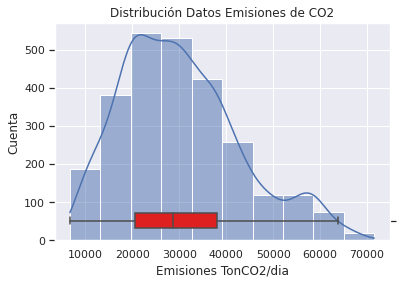

In [ ]:
CO2_dist = sns.histplot(data=df_power_system['daily_emision_CO2'], kde=True, bins=10)
CO2_dist.set_xlabel('Emisiones TonCO2/dia')
CO2_dist.set_ylabel('Cuenta')
CO2_dist.set_title('Distribución Datos Emisiones de CO2')
CO2_dist_box = CO2_dist.twinx()
sns.boxplot(x=df_power_system['daily_emision_CO2'], ax=CO2_dist_box, color='red', showfliers = False)
CO2_dist_box.set(ylim=(-1, 10));

#### *Emisiones $CH_{4}$*

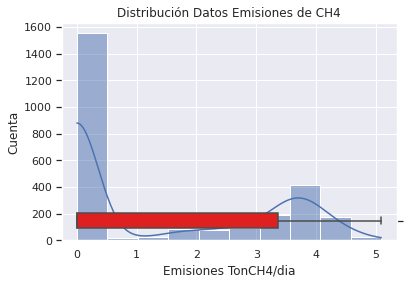

In [ ]:
CH4_dist = sns.histplot(data=df_power_system['daily_emision_CH4'], kde=True, bins=10,)
CH4_dist.set_xlabel('Emisiones TonCH4/dia')
CH4_dist.set_ylabel('Cuenta')
CH4_dist.set_title('Distribución Datos Emisiones de CH4')
CH4_dist_box = CH4_dist.twinx()
sns.boxplot(x=df_power_system['daily_emision_CH4'], ax=CH4_dist_box, color='red', showfliers = False)
CH4_dist_box.set(ylim=(-1, 10));

Con esta distribución de datos podemos ver que hay una alta concentracion de registros en cero, esto no se debe a que no hubieran emisiones este gas en esos tiempos, se debe a que no se realizaban las mediciones.

#### *Emisiones $N_{2}O$*

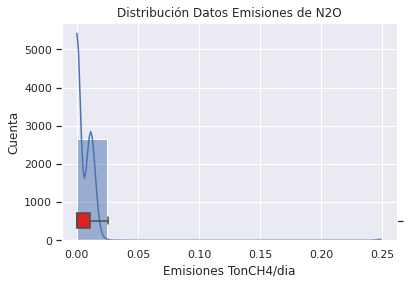

In [ ]:
N2O_dist = sns.histplot(data=df_power_system['daily_emision_N2O'], kde=True, bins=10,)
N2O_dist.set_xlabel('Emisiones TonCH4/dia')
N2O_dist.set_ylabel('Cuenta')
N2O_dist.set_title('Distribución Datos Emisiones de N2O')
N2O_dist_box = N2O_dist.twinx()
sns.boxplot(x=df_power_system['daily_emision_N2O'], ax=N2O_dist_box, color='red', showfliers = False)
N2O_dist_box.set(ylim=(-1, 10));

Con esta distribución de datos podemos ver que hay una alta concentracion de registros en cero, esto no se debe a que no hubieran emisiones este gas en esos tiempos, se debe a que no se realizaban las mediciones.

#### *Generación*

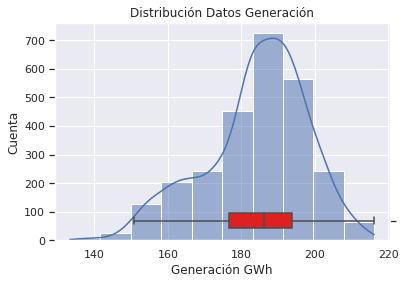

In [ ]:
gene_dist = sns.histplot(data=df_power_system['daily_generacion'], kde=True, bins=10,)
gene_dist.set_xlabel('Generación GWh')
gene_dist.set_ylabel('Cuenta')
gene_dist.set_title('Distribución Datos Generación')
gene_dist_box = gene_dist.twinx()
sns.boxplot(x=df_power_system['daily_generacion'], ax=gene_dist_box, color='red',showfliers = False)
gene_dist_box.set(ylim=(-1, 10));

#### *Consumo de combustible*

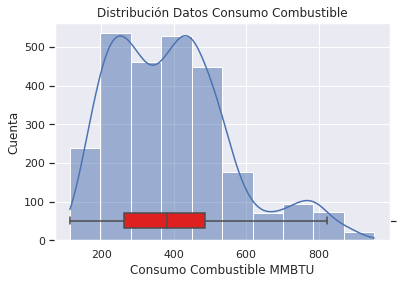

In [ ]:
consumo_dist = sns.histplot(data=df_power_system['daily_consumo_combustible'], kde=True, bins=10,)
consumo_dist.set_xlabel('Consumo Combustible MMBTU')
consumo_dist.set_ylabel('Cuenta')
consumo_dist.set_title('Distribución Datos Consumo Combustible')
consumo_dist_box = consumo_dist.twinx()
sns.boxplot(x=df_power_system['daily_consumo_combustible'], ax=consumo_dist_box, color='red',showfliers = False)
consumo_dist_box.set(ylim=(-1, 10));

#### *Precio Bolsa*

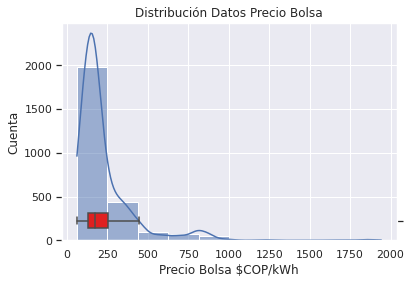

In [ ]:
precio_dist = sns.histplot(data=df_power_system['daily_precio_bolsa'], kde=True, bins=10,)
precio_dist.set_xlabel('Precio Bolsa $COP/kWh')
precio_dist.set_ylabel('Cuenta')
precio_dist.set_title('Distribución Datos Precio Bolsa')
precio_dist_box = precio_dist.twinx()
sns.boxplot(x=df_power_system['daily_precio_bolsa'], ax=precio_dist_box, color='red',showfliers = False)
precio_dist_box.set(ylim=(-1, 10));

#### *Disponibilidad Real*

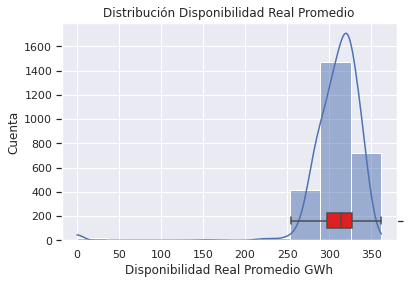

In [ ]:
disponibilidad_dist = sns.histplot(data=df_power_system['daily_disponibilidad_real'], kde=True, bins=10,)
disponibilidad_dist.set_xlabel('Disponibilidad Real Promedio GWh')
disponibilidad_dist.set_ylabel('Cuenta')
disponibilidad_dist.set_title('Distribución Disponibilidad Real Promedio')
disponibilidad_dist_box = disponibilidad_dist.twinx()
sns.boxplot(x=df_power_system['daily_disponibilidad_real'], ax=disponibilidad_dist_box, color='red',showfliers = False)
disponibilidad_dist_box.set(ylim=(-1, 10));

#### *Demanda*

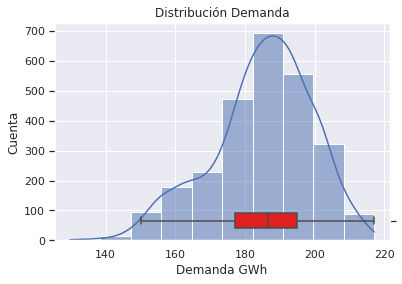

In [ ]:
demanda_dist = sns.histplot(data=df_power_system['daily_demanda'], kde=True, bins=10,)
demanda_dist.set_xlabel('Demanda GWh')
demanda_dist.set_ylabel('Cuenta')
demanda_dist.set_title('Distribución Demanda')
demanda_dist_box = demanda_dist.twinx()
sns.boxplot(x=df_power_system['daily_demanda'], ax=demanda_dist_box, color='red',showfliers = False)
demanda_dist_box.set(ylim=(-1, 10));

#### *Aportes de Energía*

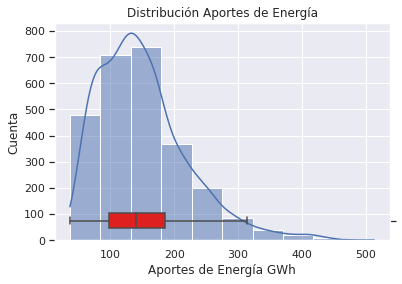

In [ ]:
aportes_dist = sns.histplot(data=df_power_system['daily_aportes_energia'], kde=True, bins=10,)
aportes_dist.set_xlabel('Aportes de Energía GWh')
aportes_dist.set_ylabel('Cuenta')
aportes_dist.set_title('Distribución Aportes de Energía')
aportes_dist_box = aportes_dist.twinx()
sns.boxplot(x=df_power_system['daily_aportes_energia'], ax=aportes_dist_box, color='red',showfliers = False)
aportes_dist_box.set(ylim=(-1, 10));

#### *Volumen Util de Energía*

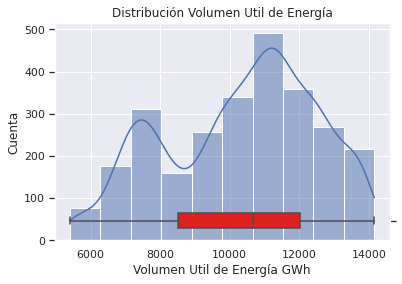

In [ ]:
volumen_dist = sns.histplot(data=df_power_system['daily_volumen_util_energia'], kde=True, bins=10,)
volumen_dist.set_xlabel('Volumen Util de Energía GWh')
volumen_dist.set_ylabel('Cuenta')
volumen_dist.set_title('Distribución Volumen Util de Energía')
volumen_dist_box = volumen_dist.twinx()
sns.boxplot(x=df_power_system['daily_volumen_util_energia'], ax=volumen_dist_box, color='red',showfliers = False)
volumen_dist_box.set(ylim=(-1, 10));

### ***2.2.4 Conclusiones de la revisión estadística***
---

Todas las variables en general presentan distribuciones sin anomalías, con la excepcion de las emisiones de CH4 y N2O.

Como se indicó anteriormente, las anomalías en las esmisiones de estos dos gases, corresponde a la falta de mediciones, por esta razón se creara un nuevo feature con las emisiones de $CO_{2 eq}$, valor que consolida las emisiones de los tres gases en un solo valor.

In [ ]:
df_power_system['daily_emision_CO2_eq'] = df_power_system['daily_emision_CO2']+df_power_system['daily_emision_CH4']*21+df_power_system['daily_emision_N2O']*310
df_power_system.tail(5)

,Date,daily_generacion,daily_emision_CO2,daily_emision_CH4,daily_emision_N2O,daily_consumo_combustible,daily_demanda,daily_aportes_energia,daily_volumen_util_energia,daily_disponibilidad_real,daily_precio_bolsa,daily_emision_CO2_eq
2648,2020-12-31,176.650730,28895.400263,1.930953,0.014821,372.92745,176.711963,118.5505,12165.3767,342.26880,146.071667,28940.544818
2649,2021-01-01,155.591653,21494.840161,1.931325,0.018282,290.57656,155.622822,118.5034,12171.7617,337.19256,152.441667,21541.065537
2650,2021-01-02,168.340658,21558.040000,1.931070,0.014160,290.33845,168.376861,124.7643,12162.1061,335.64120,130.144583,21602.982213
2651,2021-01-03,168.073034,21232.990000,1.930564,0.013592,286.83763,168.100047,131.5504,12162.8840,338.17968,137.865000,21277.745423
2652,2021-01-04,189.681741,24414.470000,3.369458,0.011948,318.64735,189.714312,106.5009,12119.5957,340.05000,153.330000,24488.932354


# **3. Preparación de los datos**
---

## **3.1. Limpieza del conjunto de datos**
---

Debido a que el análisis se realizará con las emisiones de $CO_{2eq}$ podemos eliminar las columnas de las emisiones de $CO_2$, $CH_4$ y $N_2O$.

In [ ]:
df_power_system_clean = df_power_system.drop(['daily_emision_CO2','daily_emision_CH4', 'daily_emision_N2O'], axis=1)
df_power_system_clean.sample(5)

,Date,daily_generacion,daily_consumo_combustible,daily_demanda,daily_aportes_energia,daily_volumen_util_energia,daily_disponibilidad_real,daily_precio_bolsa,daily_emision_CO2_eq
489,2015-02-02,181.728180,427.96298,180.603273,104.0015,10486.515621,303.62928,156.216250,29985.470000
795,2015-12-05,184.863923,818.80996,185.219787,113.0070,11524.134600,299.11584,800.111667,60906.280000
1324,2017-05-17,189.711851,171.34488,189.787211,377.4215,11868.909800,334.98384,66.637083,10888.390000
2445,2020-06-11,179.295818,722.39674,187.362362,186.8419,6485.835200,300.90936,400.840417,55511.382459
861,2016-02-09,192.730804,820.25530,192.714480,52.3669,8449.276100,311.78352,408.736667,61687.220000


## **3.2. Preprocesamiento y transformación de los datos**
---

La columna 'Date' de la fecha, habia sido trabajada como string, se hace conveniente convertirla al objeto de fecha de Pandas

In [ ]:
df_power_system_clean['Date'] = pd.to_datetime(df_power_system_clean['Date']).dt.date

Por otro lado, es posible que por algún problema de latencia en las solicitudes a la API de XM, los datos no esten organizados en orden cronológico, por esta razón se realiza un ordenamiento del dataset en orden cronológico.

In [ ]:
df_power_system_clean.sort_values(by='Date', inplace=True)

### ***3.2.1 Visualización de series de tiempo***

Con el fin de encontrar datos anómalos realizaremos construiremos varias gráficas de las variables vs el tiempo.

#### *Emisiones*

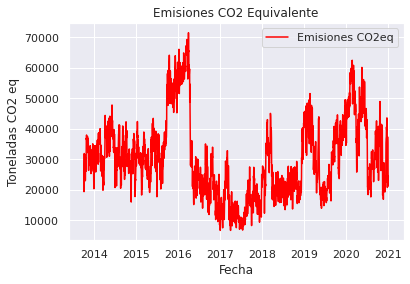

In [ ]:
ax = sns.lineplot(data=df_power_system_clean, x='Date', y='daily_emision_CO2_eq', label='Emisiones CO2eq', color='red')
ax.set_title('Emisiones CO2 Equivalente')
ax.set_xlabel('Fecha')
ax.set_ylabel('Toneladas CO2 eq')
ax.legend();

#### *Variables de Energía*

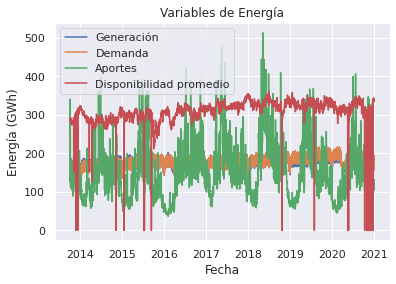

In [ ]:
sns.lineplot(data=df_power_system_clean, x='Date', y='daily_generacion', label='Generación')
sns.lineplot(data=df_power_system_clean, x='Date', y='daily_demanda',label='Demanda')
sns.lineplot(data=df_power_system_clean, x='Date', y='daily_aportes_energia', label='Aportes')
ax = sns.lineplot(data=df_power_system_clean, x='Date', y='daily_disponibilidad_real', label='Disponibilidad promedio')
ax.set_title('Variables de Energía')
ax.set_xlabel('Fecha')
ax.set_ylabel('Energía (GWh)')
ax.legend()


De esta gráfica podemos concluir que la disponibilidad tiene datos anomálos en 0, esto se debe a que esta variable fue extraida usando web scraping, lo cual puede generar registros en cero.

**Solución**

Con el fin de no perder registros, tiene sentido fisico reemplazar los ceros por el ultimo dato válido.

In [ ]:
df_power_system_clean['daily_disponibilidad_real'] = df_power_system_clean['daily_disponibilidad_real'].replace(to_replace=0, method='ffill')

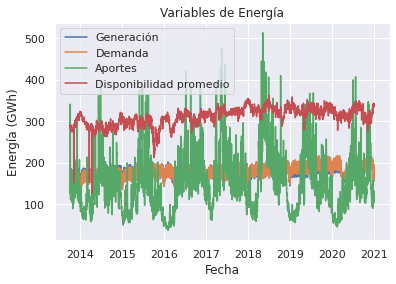

In [ ]:
sns.lineplot(data=df_power_system_clean, x='Date', y='daily_generacion', label='Generación')
sns.lineplot(data=df_power_system_clean, x='Date', y='daily_demanda',label='Demanda')
sns.lineplot(data=df_power_system_clean, x='Date', y='daily_aportes_energia', label='Aportes')
ax = sns.lineplot(data=df_power_system_clean, x='Date', y='daily_disponibilidad_real', label='Disponibilidad promedio')
ax.set_title('Variables de Energía')
ax.set_xlabel('Fecha')
ax.set_ylabel('Energía (GWh)')
ax.legend();

Si bien, la variable 'daily_volumen_util_energia' es de energía, por su magnitud se grafica de forma independiente.

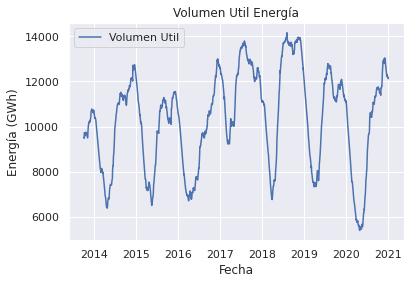

In [ ]:
ax = sns.lineplot(data=df_power_system_clean, x='Date', y='daily_volumen_util_energia', label='Volumen Util')
ax.set_title('Volumen Util Energía')
ax.set_xlabel('Fecha')
ax.set_ylabel('Energía (GWh)')
ax.legend();

#### *Consumo de Combustible*

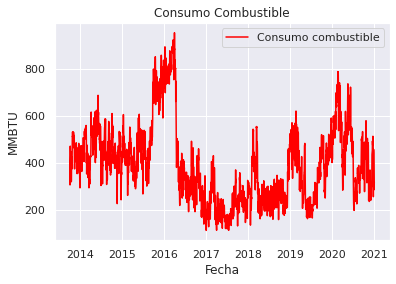

In [ ]:
ax = sns.lineplot(data=df_power_system_clean, x='Date', y='daily_consumo_combustible', label='Consumo combustible', palette='spectral', color='red')
ax.set_title('Consumo Combustible')
ax.set_xlabel('Fecha')
ax.set_ylabel('MMBTU')
ax.legend();

#### *Precio Bolsa*

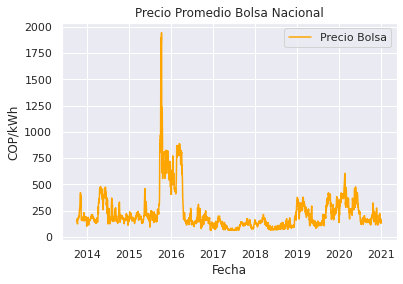

In [ ]:
ax = sns.lineplot(data=df_power_system_clean, x='Date', y='daily_precio_bolsa', color='orange', label='Precio Bolsa')
ax.set_title('Precio Promedio Bolsa Nacional')
ax.set_xlabel('Fecha')
ax.set_ylabel('COP/kWh')
sns.set(rc={'figure.figsize':(12,6)})
ax.legend();

Para las demás variables no se encontraron anomalias respecto a la integridad de los datos. 

## **3.3. Selección de datos finales para el análisis posterior**
---

A continuacion se presenta el dataset con las *features* con las cuales se realizará el análisis.

In [ ]:
df_power_system_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2653 entries, 0 to 2652
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        2653 non-null   object 
 1   daily_generacion            2653 non-null   float64
 2   daily_consumo_combustible   2653 non-null   float64
 3   daily_demanda               2653 non-null   float64
 4   daily_aportes_energia       2653 non-null   float64
 5   daily_volumen_util_energia  2653 non-null   float64
 6   daily_disponibilidad_real   2653 non-null   float64
 7   daily_precio_bolsa          2653 non-null   float64
 8   daily_emision_CO2_eq        2653 non-null   float64
dtypes: float64(8), object(1)
memory usage: 207.3+ KB


In [ ]:
df_power_system_clean.head(5)

,Date,daily_generacion,daily_consumo_combustible,daily_demanda,daily_aportes_energia,daily_volumen_util_energia,daily_disponibilidad_real,daily_precio_bolsa,daily_emision_CO2_eq
0,2013-10-01,172.693215,395.97705,170.653599,142.7108,9520.171994,284.04768,147.634583,26770.66
1,2013-10-02,176.526617,306.79428,173.140071,126.0285,9480.617577,283.22184,148.921667,19434.71
2,2013-10-03,179.807460,414.36826,177.865752,153.9948,9488.427943,284.82792,170.765000,28364.49
3,2013-10-04,173.452142,471.70049,171.838308,341.0759,9685.847285,292.49064,156.358333,31935.54
4,2013-10-05,164.918611,446.01587,165.308256,167.3248,9726.045134,288.18528,153.775833,30412.38


In [ ]:
df_power_system_clean.tail(5)

,Date,daily_generacion,daily_consumo_combustible,daily_demanda,daily_aportes_energia,daily_volumen_util_energia,daily_disponibilidad_real,daily_precio_bolsa,daily_emision_CO2_eq
2648,2020-12-31,176.650730,372.92745,176.711963,118.5505,12165.3767,342.26880,146.071667,28940.544818
2649,2021-01-01,155.591653,290.57656,155.622822,118.5034,12171.7617,337.19256,152.441667,21541.065537
2650,2021-01-02,168.340658,290.33845,168.376861,124.7643,12162.1061,335.64120,130.144583,21602.982213
2651,2021-01-03,168.073034,286.83763,168.100047,131.5504,12162.8840,338.17968,137.865000,21277.745423
2652,2021-01-04,189.681741,318.64735,189.714312,106.5009,12119.5957,340.05000,153.330000,24488.932354


In [ ]:
df_power_system_clean.describe()

,daily_generacion,daily_consumo_combustible,daily_demanda,daily_aportes_energia,daily_volumen_util_energia,daily_disponibilidad_real,daily_precio_bolsa,daily_emision_CO2_eq
count,2653.000000,2653.000000,2653.000000,2653.000000,2653.000000,2653.000000,2653.000000,2653.000000
mean,184.065605,395.808441,184.932307,151.122513,10320.982485,311.557013,227.961451,30415.946459
std,14.037636,166.285991,14.477087,71.222530,2162.867046,21.892778,190.232832,12885.491676
min,133.322955,113.521380,129.772796,36.780700,5405.007800,126.580800,61.170000,6734.720000
25%,176.493194,262.339800,177.027729,98.606000,8511.299972,297.744720,128.510417,20722.350000
50%,186.057716,382.012280,186.508033,139.561600,10668.741247,314.275200,169.939167,28767.140000
75%,193.655700,487.043380,194.981898,185.270700,12013.332158,327.030960,254.332500,37956.930000
max,216.153406,953.626970,217.078890,513.359500,14152.961900,362.016000,1942.696667,71519.160000


# **4. Análisis de Datos**
---

## **4.1. Análisis de Correlaciones**

En esta sección usaremos el analisis de correlaciones para encontrar las variables que afectan las **emisiones equivalentes de $CO_2$**.

Como nuestros datos puede tener *outliers* usaremos el método de **Spearman**

In [ ]:
corr_matrix = df_power_system_clean.corr(method='spearman')
corr_matrix

,daily_generacion,daily_consumo_combustible,daily_demanda,daily_aportes_energia,daily_volumen_util_energia,daily_disponibilidad_real,daily_precio_bolsa,daily_emision_CO2_eq
daily_generacion,1.000000,-0.017874,0.967738,-0.013172,0.256662,0.247613,-0.001058,0.049627
daily_consumo_combustible,-0.017874,1.000000,-0.022685,-0.519268,-0.473753,-0.524546,0.882050,0.968902
daily_demanda,0.967738,-0.022685,1.000000,-0.008004,0.189300,0.321763,0.031699,0.072383
daily_aportes_energia,-0.013172,-0.519268,-0.008004,1.000000,0.261659,0.177332,-0.508188,-0.528420
daily_volumen_util_energia,0.256662,-0.473753,0.189300,0.261659,1.000000,0.326949,-0.489358,-0.457537
daily_disponibilidad_real,0.247613,-0.524546,0.321763,0.177332,0.326949,1.000000,-0.479658,-0.384404
daily_precio_bolsa,-0.001058,0.882050,0.031699,-0.508188,-0.489358,-0.479658,1.000000,0.893276
daily_emision_CO2_eq,0.049627,0.968902,0.072383,-0.528420,-0.457537,-0.384404,0.893276,1.000000


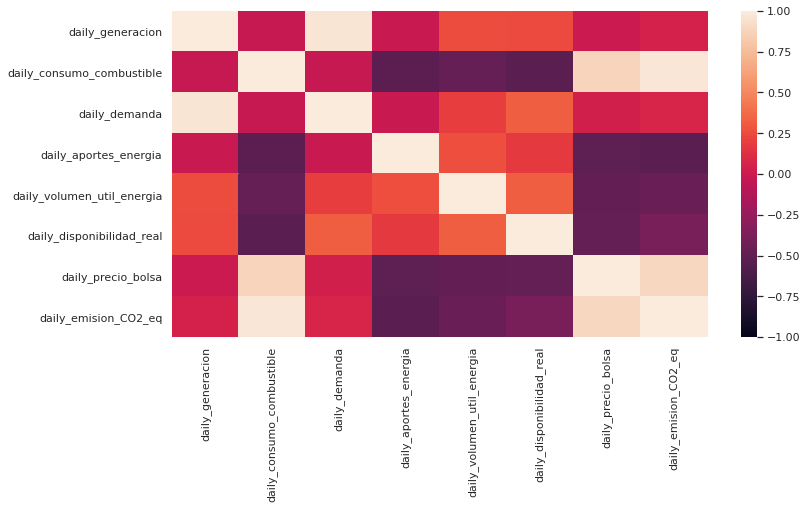

In [ ]:
sns.heatmap(corr_matrix, vmin=-1, vmax=1);

De este análisis de correlaciones podemos concluir:
1. Que las siguientes varaibles tienen una relacion directa con las emisiones de $CO_2eq$:
  * Consumo de combustible (0.968)
  * Precio de bolsa (0.893)
  * Demanda (0.072)
  * Generación (0.049)
2. Que las siguientes variables tienen una relación inversa con las emisiones $CO_2eq$:
  * Aportes de energía (-0.528)
  * Volumen útil de energía (-0.457)
  * Disponibilidad real (-0.384)

A continuación se grafican estas relaciones:

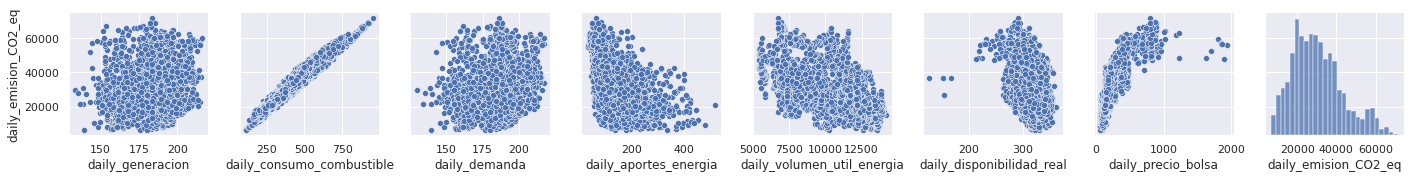

In [ ]:
sns.pairplot(df_power_system_clean,y_vars=['daily_emision_CO2_eq']);

## **4.2. Análisis de Series de Tiempo**
---

Se realizará un análisis básico de series de tiempo para determinar el impacto del clima en las emesiones equivalentes de $CO_2$.

El análisis toma como base que los aportes de energía representan la cantidad de agua de lluvia que aprovecha el SIN.


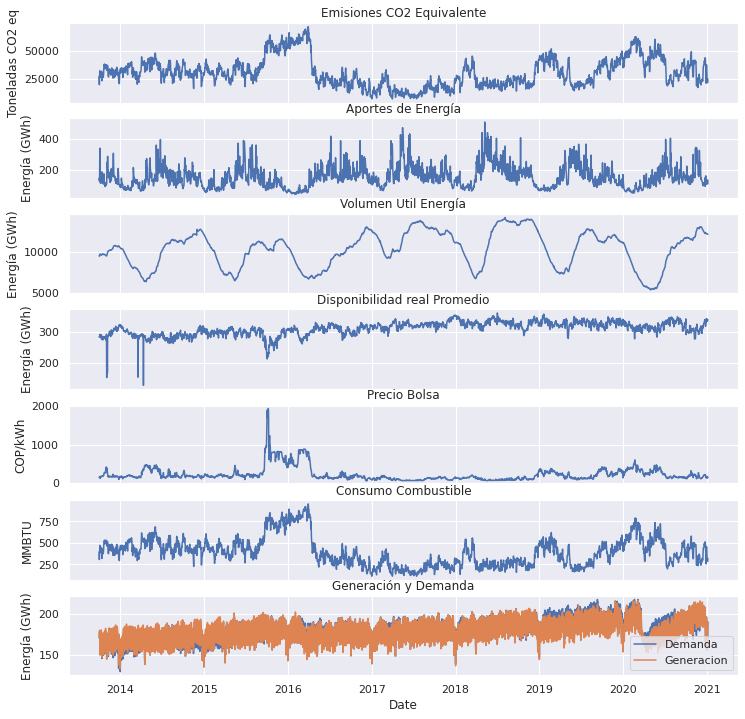

In [ ]:
fig, axes = plt.subplots(7, 1, sharex=True, figsize=(12,12))

#emisiones
sns.lineplot(ax=axes[0],data=df_power_system_clean, x='Date', y='daily_emision_CO2_eq')
axes[0].set_title('Emisiones CO2 Equivalente')
axes[0].set_ylabel('Toneladas CO2 eq')

#Aportes
sns.lineplot(ax=axes[1],data=df_power_system_clean, x='Date', y='daily_aportes_energia')
axes[1].set_title('Aportes de Energía')
axes[1].set_ylabel('Energía (GWh)')

#Volumen util
sns.lineplot(ax=axes[2], data=df_power_system_clean, x='Date', y='daily_volumen_util_energia')
axes[2].set_title('Volumen Util Energía')
axes[2].set_ylabel('Energía (GWh)')

#Disponibilidad Promedio
sns.lineplot(ax=axes[3],data=df_power_system_clean, x='Date', y='daily_disponibilidad_real')
axes[3].set_title('Disponibilidad real Promedio')
axes[3].set_ylabel('Energía (GWh)')

#Precio
sns.lineplot(ax=axes[4],data=df_power_system_clean, x='Date', y='daily_precio_bolsa')
axes[4].set_title('Precio Bolsa')
axes[4].set_ylabel('COP/kWh')

#Consumo Combustible
sns.lineplot(ax=axes[5],data=df_power_system_clean, x='Date', y='daily_consumo_combustible')
axes[5].set_title('Consumo Combustible')
axes[5].set_ylabel('MMBTU')

#Genreacion y demanda
sns.lineplot(ax=axes[6],data=df_power_system_clean, x='Date', y='daily_demanda', label='Demanda')
sns.lineplot(ax=axes[6],data=df_power_system_clean, x='Date', y='daily_generacion', label='Generacion')
axes[6].set_title('Generación y Demanda')
axes[6].set_ylabel('Energía (GWh)');

### ***4.2.1. Análisis General***
---
1. Es evidente que en el cuarto trimestre de 2015 y el primer trimestre de 2016 hubo una gran anomalía en todo el SIN, esto lo vamos a analizar en profundidad mas adelante.
2. La generación y demanta actual muestra una tendencia ligeramente positiva en todo el intervalo de tiempo y tiene dos puntos donde la tendencia se invierte localmente, en el cambio de año 2015-2016 y a principios de 2020.
3. La disponibilidad real muestra una tendencia levemente positiva de 2013 a 2018 y tiene un dropdown muy notorio en el cambio de año 2014-2015, y al final de 2015. También invierte la tendencia a levemente negativa de 2018 a mediados de 2020.
4. Los aportes de energia, volumen útil muestran un claro comportamiento estacional, aspecto que tiene claro que el mínimo se ubica en el primer semestre de 2016 y 2020.
5. El precio parece tener un comportamiento de series temporales estacionarias a lo largo del intervalo de tiempo analizado.
6. Se hace evidente la correlación de las variables que afectan las emisiones, donde incluso las graficas son muy similares en las *features* fuertemente correlacionadas, ver grafica de Emisiones $CO_2eq$, Precio y Consumo de Combustible.


### ***4.2.2. Análisis finales de 2013 a comienzos 2015***
---

En este período de tiempo, hubo 3 fuertes bajas de disponibilidad real, lo que provocó el aumento del precio y de las emisiones en ese periodo.

La disponibilidad puede hacer subir el precio ya hay menos plantas de energía que producen la electricidad suficiente para el sistema, menos oferta, misma demanda, el precio sube.

Además, si la menor disponibilidad del sistema se produce por la caída de una central hidráulica, las centrales térmicas deben iniciar la generación a un costo muy superior y que produce emisiones contaminantes.

### ***4.2.2. Análisis del periodo finales 2015 y inicio 2016***
---
Este es el período más interesante, desde octubre de 2015 hasta abril de 2016 las variables tienen un comportamiento muy diferente.

Dentro de este periodo podemos encontrar varios máximos o mínimos sobre todo el período de tiempo analizado 2013.10.01 a 2021.01.04:

* La mayor cantidad de emisiones.
* El mayor consumo de combustible fósil.
* El precio más alto.
* Las aportes de energía (agua) más bajos.
* La disponibilidad promedio más baja (Para este análisis consideramos como valores atípicos los mínimos presentados en 2013 y 2014, y se excluyen)

Estos números son muy diferentes en comparación con los otros años, sin embargo, hay una razón, [Fenómeno del Niño](https://es.wikipedia.org/wiki/El_Ni%C3%B1o_(fen%C3%B3meno)).

#### ***Efectos principales de El Niño en el SIN***

Las emisiones, el precio y el consumo de combustible se vieron muy afectados, ya que durante este período tuvo los valores más altos, con mucha diferencia. 

Hay varias razones que explican este comportamiento:

* A principios de octubre se inició oficialmente el Feneomeno de El Niño, lo que significa que el gobierno lo anunció oficialmente, esto generó especulación en el mercado.
* Con el fin de ahorrar agua para los meses más secos, varias centrales hidráulicas pararon o desaceleraron su operación, por lo que las centrales de gas natural y carbón iniciaron su operación a su máxima capacidad, lo que provocó el incremento del consumo de combustibles fósiles mas costosos.
* Además, la estrategia de ahorro de agua provocó una caída de la disponibilidad promedio.

* Si observamos las gráficas, podemos ver que en los primeros meses de El Niño, de octubre a diciembre, el volumen útil aumentó, mientras que disminuyeron los aportes de agua, eso no es lógico, y se explica por la estrategia de ahorro de agua.

Si bien el precio y las emisiones de $CO_2$ fueron elevadas, el sistema demostró que es capaz de soportar este tipo de eventos, por su capacidad de equilibrar la generación hidráulica-térmica, y también por la correcta estrategia de ahorro energético ejecutada por el operador del SIN. Todo esto sin necesidad de hacer racionamientos.

### ***4.2.3. Análisis del periodo 2020***
---
Como es sabido por todos, el año 2020 fue un año muy retador, la pandemia de coronavirus impactó al mundo, de una forma sin precedentes recientes.

A fines de marzo, Colombia inició un régimen de cuarentena muy duro que duró más de 6 meses.

Abril fue el mes más difícil, donde muchas empresas pararon sus operaciones.

Esta paron económico está claramente representado en la energía demadada y generada este mes. Este comportamiento nos muestra que el sector industrial es un gran consumidor de electricidad, incluso con todos los colombianos en casa, estos hogares llenos de gente todo el día no consumieron tanto como lo hace la industria.

# **5. Mapa Coroplético**

Para la consutrcción del mapa coroplético se usaron los siguientes datasets:
* Listado de Recursos, optenidos de la API de XM.
* Ubicación de los recursos, suministrados por XM via correo electronico.
* Municipios, suministrado por el Programa de Formación en DS en el taller guiado de GeoPandas.

A continuacion se realizará la limpieza y transformación específica para la representación geográfica.

In [ ]:
# Librería de datos geoespaciales GeoPandas.
!pip install -U geopandas 

Requirement already up-to-date: geopandas in /usr/local/lib/python3.7/dist-packages (0.9.0)


In [ ]:
!pip install -U rtree mapclassify fiona pyproj
!sudo apt install libspatialindex-dev

Requirement already up-to-date: rtree in /usr/local/lib/python3.7/dist-packages (0.9.7)
Requirement already up-to-date: mapclassify in /usr/local/lib/python3.7/dist-packages (2.4.2)
Requirement already up-to-date: fiona in /usr/local/lib/python3.7/dist-packages (1.8.18)
Requirement already up-to-date: pyproj in /usr/local/lib/python3.7/dist-packages (3.0.1)
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libspatialindex-dev is already the newest version (1.8.5-5).
0 upgraded, 0 newly installed, 0 to remove and 30 not upgraded.


In [ ]:
import geopandas as gpd         # Librería de datos geoespaciales GeoPandas.
import shapely                  # Librería de manipulación de objetos geométricos.
from shapely.geometry import *  # Herramientas para manipulación geométrica.

## **5.1 Listado de Recursos**

In [ ]:
df_listado_recursos

,Unnamed: 0,Id,Code,Name,Type,Disp,RecType,CompanyCode,EnerSource,OperStartDate,CapaValue,Date
0,0,Recurso,2QBW,EL POPAL,HIDRAULICA,NO DESPACHADO CENTRALMENTE,FILO DE AGUA,LCSG,AGUA,2014-03-31T00:00:00,19900.0,2019-10-01
1,1,Recurso,2QEK,SALTO II,HIDRAULICA,DESPACHADO CENTRALMENTE,FILO DE AGUA,ENDG,AGUA,2014-06-25T00:00:00,35000.0,2019-10-01
2,2,Recurso,2QRL,LA REBUSCA,HIDRAULICA,NO DESPACHADO CENTRALMENTE,NORMAL,HZEG,AGUA,2014-07-24T00:00:00,700.0,2019-10-01
3,3,Recurso,2QV2,BAJO TULUA,HIDRAULICA,NO DESPACHADO CENTRALMENTE,NORMAL,EPSG,AGUA,2015-01-30T00:00:00,19900.0,2019-10-01
4,4,Recurso,2R22,LAGUNETA,HIDRAULICA,NO DESPACHADO CENTRALMENTE,NORMAL,ENDG,AGUA,2014-12-17T00:00:00,18000.0,2019-10-01
...,...,...,...,...,...,...,...,...,...,...,...,...
102448,102448,Recurso,VNTB,VENTANA B,HIDRAULICA,NO DESPACHADO CENTRALMENTE,NORMAL,HDTG,AGUA,1957-11-01T00:00:00,2500.0,2021-01-04
102449,102449,Recurso,ZPA2,ZIPAEMG 2,TERMICA,DESPACHADO CENTRALMENTE,NORMAL,ENDG,CARBON,1964-01-01T00:00:00,35000.0,2021-01-04
102450,102450,Recurso,ZPA3,ZIPAEMG 3,TERMICA,DESPACHADO CENTRALMENTE,NORMAL,ENDG,CARBON,1976-01-01T00:00:00,63000.0,2021-01-04
102451,102451,Recurso,ZPA4,ZIPAEMG 4,TERMICA,DESPACHADO CENTRALMENTE,NORMAL,ENDG,CARBON,1981-04-01T00:00:00,64000.0,2021-01-04


In [ ]:
grouped_df = df_listado_recursos.groupby('Code')
df_listado_recursos_unicos = grouped_df.first()
df_listado_recursos_unicos = df_listado_recursos_unicos.reset_index()
df_listado_recursos_unicos

,Code,Unnamed: 0,Id,Name,Type,Disp,RecType,CompanyCode,EnerSource,OperStartDate,CapaValue,Date
0,2QBW,0,Recurso,EL POPAL,HIDRAULICA,NO DESPACHADO CENTRALMENTE,FILO DE AGUA,LCSG,AGUA,2014-03-31T00:00:00,19900.0,2019-10-01
1,2QEK,1,Recurso,SALTO II,HIDRAULICA,DESPACHADO CENTRALMENTE,FILO DE AGUA,ENDG,AGUA,2014-06-25T00:00:00,35000.0,2019-10-01
2,2QRL,2,Recurso,LA REBUSCA,HIDRAULICA,NO DESPACHADO CENTRALMENTE,NORMAL,HZEG,AGUA,2014-07-24T00:00:00,700.0,2019-10-01
3,2QV2,3,Recurso,BAJO TULUA,HIDRAULICA,NO DESPACHADO CENTRALMENTE,NORMAL,EPSG,AGUA,2015-01-30T00:00:00,19900.0,2019-10-01
4,2R22,4,Recurso,LAGUNETA,HIDRAULICA,NO DESPACHADO CENTRALMENTE,NORMAL,ENDG,AGUA,2014-12-17T00:00:00,18000.0,2019-10-01
...,...,...,...,...,...,...,...,...,...,...,...,...
230,VNTB,209,Recurso,VENTANA B,HIDRAULICA,NO DESPACHADO CENTRALMENTE,NORMAL,GNCG,AGUA,1957-11-01T00:00:00,2500.0,2019-10-01
231,ZPA2,210,Recurso,ZIPAEMG 2,TERMICA,DESPACHADO CENTRALMENTE,NORMAL,ENDG,CARBON,1964-01-01T00:00:00,35000.0,2019-10-01
232,ZPA3,211,Recurso,ZIPAEMG 3,TERMICA,DESPACHADO CENTRALMENTE,NORMAL,ENDG,CARBON,1976-01-01T00:00:00,63000.0,2019-10-01
233,ZPA4,212,Recurso,ZIPAEMG 4,TERMICA,DESPACHADO CENTRALMENTE,NORMAL,ENDG,CARBON,1981-04-01T00:00:00,64000.0,2019-10-01


In [ ]:
df_listado_recursos_unicos.rename({'Code': 'codigo_planta', 'Name': 'nombre_planta'}, axis=1, inplace=True)

In [ ]:
df_listado_recursos_unicos.drop(['Unnamed: 0', 'Id', 'Disp', 'CompanyCode', 'Date', 'OperStartDate', 'RecType'], axis=1, inplace=True)
df_listado_recursos_unicos

,codigo_planta,nombre_planta,Type,EnerSource,CapaValue
0,2QBW,EL POPAL,HIDRAULICA,AGUA,19900.0
1,2QEK,SALTO II,HIDRAULICA,AGUA,35000.0
2,2QRL,LA REBUSCA,HIDRAULICA,AGUA,700.0
3,2QV2,BAJO TULUA,HIDRAULICA,AGUA,19900.0
4,2R22,LAGUNETA,HIDRAULICA,AGUA,18000.0
...,...,...,...,...,...
230,VNTB,VENTANA B,HIDRAULICA,AGUA,2500.0
231,ZPA2,ZIPAEMG 2,TERMICA,CARBON,35000.0
232,ZPA3,ZIPAEMG 3,TERMICA,CARBON,63000.0
233,ZPA4,ZIPAEMG 4,TERMICA,CARBON,64000.0


## **5.2 Ubicación Plantas**

In [ ]:
df_ubicacion_plantas

,Identificador,Nombre de la Planta o Unidad,Municipio,Departamento
0,Sol0003,AGPE NAFERTEX 1,Medellin,Antioquia
1,Unh0491,ALEJANDRÍA 1,Alejandria,Antioquia
2,Unh0570,SANTA RITA 1,Andes,Antioquia
3,Unh0548,PROVIDENCIA 1,Anori,Antioquia
4,Unh0538,NIQUIA 1,Bello,Antioquia
...,...,...,...,...
328,Grp0101,RUMOR,Tulua,Valle del Cauca
329,Grp0227,ALTO TULUA,Tulua,Valle del Cauca
330,Grp0245,BAJO TULUA,Tulua,Valle del Cauca
331,Grp0261,EL COCUYO,Versalles,Valle del Cauca


In [ ]:
df_ubicacion_plantas.rename({'Nombre de la Planta o Unidad': 'nombre_planta'}, inplace=True,axis=1)
df_ubicacion_plantas.drop('Identificador', inplace=True, axis=1)
df_ubicacion_plantas

,nombre_planta,Municipio,Departamento
0,AGPE NAFERTEX 1,Medellin,Antioquia
1,ALEJANDRÍA 1,Alejandria,Antioquia
2,SANTA RITA 1,Andes,Antioquia
3,PROVIDENCIA 1,Anori,Antioquia
4,NIQUIA 1,Bello,Antioquia
...,...,...,...
328,RUMOR,Tulua,Valle del Cauca
329,ALTO TULUA,Tulua,Valle del Cauca
330,BAJO TULUA,Tulua,Valle del Cauca
331,EL COCUYO,Versalles,Valle del Cauca


In [ ]:
df_ubicacion_plantas['Municipio'] = df_ubicacion_plantas['Municipio'].apply(lambda x: x.upper())
df_ubicacion_plantas['Departamento'] = df_ubicacion_plantas['Departamento'].apply(lambda x: x.upper())
df_ubicacion_plantas

,nombre_planta,Municipio,Departamento
0,AGPE NAFERTEX 1,MEDELLIN,ANTIOQUIA
1,ALEJANDRÍA 1,ALEJANDRIA,ANTIOQUIA
2,SANTA RITA 1,ANDES,ANTIOQUIA
3,PROVIDENCIA 1,ANORI,ANTIOQUIA
4,NIQUIA 1,BELLO,ANTIOQUIA
...,...,...,...
328,RUMOR,TULUA,VALLE DEL CAUCA
329,ALTO TULUA,TULUA,VALLE DEL CAUCA
330,BAJO TULUA,TULUA,VALLE DEL CAUCA
331,EL COCUYO,VERSALLES,VALLE DEL CAUCA


## **5.3 Municipios de Colombia**

In [ ]:
# Cargar archivo de datos geográficos de los municipios de Colombia.

# Primero necesitamos instalar la utilidad 'gdown' debido al tamaño del archivo:
!pip install gdown

# Observe que la cadena "id=..." en la URL corresponde al ID del archivo de Drive que queremos descargar 
!gdown https://drive.google.com/uc?id=1wMwLcKZ0v18Dwse0Ln1-GTimFHpgSlir

Downloading...
From: https://drive.google.com/uc?id=1wMwLcKZ0v18Dwse0Ln1-GTimFHpgSlir
To: /content/colombia.zip
50.2MB [00:00, 190MB/s]


In [ ]:
!unzip colombia.zip

Archive:  colombia.zip
replace divipola_dpto_index.hdf? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: divipola_dpto_index.hdf  
  inflating: divipola_mun_index.hdf  
  inflating: shapes/Cabecera Municipal.dbf  
  inflating: shapes/Cabecera Municipal.prj  
  inflating: shapes/Cabecera Municipal.sbn  
  inflating: shapes/Cabecera Municipal.sbx  
  inflating: shapes/Cabecera Municipal.shp  
  inflating: shapes/Cabecera Municipal.shp.xml  
  inflating: shapes/Cabecera Municipal.shx  
  inflating: shapes/desktop.ini      
  inflating: shapes/Fuera colombia.dbf  
  inflating: shapes/Fuera colombia.prj  
  inflating: shapes/Fuera colombia.sbn  
  inflating: shapes/Fuera colombia.sbx  
  inflating: shapes/Fuera colombia.shp  
  inflating: shapes/Fuera colombia.shx  
  inflating: shapes/Limite Departamental.dbf  
  inflating: shapes/Limite Departamental.prj  
  inflating: shapes/Limite Departamental.sbn  
  inflating: shapes/Limite Departamental.sbx  
  inflating: shapes/Limite Departame

In [ ]:
col_mun = gpd.read_file(r"shapes/Limite Municipal.shp")       # Municipios
col_deps = gpd.read_file(r"shapes/Limite Departamental.shp")  # Departamentos

In [ ]:
col_mun.rename({'NOMBRE_ENT': 'Municipio', 'DEPARTAMEN':'Departamento'}, axis=1, inplace=True)
col_mun

,COO_DANE,COUNT,FID_1,OBJECTID,AREAS,Municipio,CATEGORIA,Departamento,COD_DEPART,COD_MUNICI,AREA_KM,OBSERVACIO,PK_CUE,SHAPE_LENG,SHAPE_AREA,COO_DANE_1,COO_DAN_N,geometry
0,05001,1,780,1940,3.688920e+08,MEDELLÍN,M,ANTIOQUIA,05,001,368.891987,None,502085.0,0.913748,0.030255,05001,5001.0,"POLYGON ((-75.62947 6.19635, -75.62931 6.19566..."
1,05002,1,1061,2221,5.105939e+08,ABEJORRAL,M,ANTIOQUIA,05,002,510.593949,None,502382.0,1.101427,0.041666,05002,5002.0,"POLYGON ((-75.41551 5.90179, -75.41534 5.90193..."
2,05004,1,925,2085,2.928488e+08,ABRIAQUÍ,M,ANTIOQUIA,05,004,292.848815,None,502223.0,0.789946,0.023918,05004,5004.0,"POLYGON ((-76.01133 6.64633, -76.01142 6.64586..."
3,05021,1,506,1666,1.325847e+08,ALEJANDRÍA,M,ANTIOQUIA,05,021,132.584682,None,502108.0,0.721681,0.010833,05021,5021.0,"POLYGON ((-75.02849 6.41628, -75.02842 6.41628..."
4,05030,1,210,1370,8.287013e+07,AMAGÁ,M,ANTIOQUIA,05,030,82.870126,None,501989.0,0.418358,0.006763,05030,5030.0,"POLYGON ((-75.67406 6.08290, -75.67384 6.08257..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1117,97889,1,701,1861,4.667964e+09,YAVARATÉ (Cor. Departamental),CD,VAUPÉS,97,889,0.000000,En proceso de Aprobación. Sujeto a cambios,501325.0,3.973686,0.376953,97889,97889.0,"POLYGON ((-70.03816 0.56519, -70.03816 0.56519..."
1118,99001,1,504,1664,1.220566e+10,PUERTO CARREÑO,M,VICHADA,99,001,12205.660436,En proceso de Aprobación. Sujeto a cambios,502065.0,5.474851,0.985917,99001,99001.0,"POLYGON ((-67.81400 5.34258, -67.81467 5.34316..."
1119,99524,1,362,1522,1.837187e+10,LA PRIMAVERA,M,VICHADA,99,524,0.000000,En proceso de Aprobación. Sujeto a cambios,502033.0,7.569261,1.490258,99524,99524.0,"POLYGON ((-68.81353 6.17289, -68.81653 5.41894..."
1120,99624,1,337,1497,3.914730e+09,SANTA ROSALÍA,M,VICHADA,99,624,3914.729536,None,501646.0,3.399736,0.318045,99624,99624.0,"POLYGON ((-70.66411 5.38671, -70.65230 5.37409..."


In [ ]:
print(*col_mun['Departamento'].unique())

ANTIOQUIA ATLANTICO BOGOTA, D.C. BOLIVAR BOYACA CALDAS CAQUETA CAUCA CESAR CORDOBA CUNDINAMARCA CHOCO HUILA LA GUAJIRA MAGDALENA META NARIÑO NORTE DE SANTANDER QUINDIO RISARALDA SANTANDER SUCRE TOLIMA VALLE DEL CAUCA ARAUCA CASANARE PUTUMAYO SAN ANDRES PROVIDENCIA Y SANTA CATALINA AMAZONAS GUAINIA GUAVIARE VAUPES VICHADA


In [ ]:
def normalize(s):
    replacements = (
        ("Á", "A"),
        ("É", "E"),
        ("Í", "I"),
        ("Ó", "O"),
        ("Ú", "U"),
        ("Ü", "U"),
    )
    for a, b in replacements:
        s = s.replace(a, b).replace(a.upper(), b.upper())
    return s

In [ ]:
col_mun['Municipio'] = col_mun['Municipio'].apply(normalize)
col_mun['Departamento'] = col_mun['Departamento'].apply(normalize)
col_mun

,COO_DANE,COUNT,FID_1,OBJECTID,AREAS,Municipio,CATEGORIA,Departamento,COD_DEPART,COD_MUNICI,AREA_KM,OBSERVACIO,PK_CUE,SHAPE_LENG,SHAPE_AREA,COO_DANE_1,COO_DAN_N,geometry
0,05001,1,780,1940,3.688920e+08,MEDELLIN,M,ANTIOQUIA,05,001,368.891987,None,502085.0,0.913748,0.030255,05001,5001.0,"POLYGON ((-75.62947 6.19635, -75.62931 6.19566..."
1,05002,1,1061,2221,5.105939e+08,ABEJORRAL,M,ANTIOQUIA,05,002,510.593949,None,502382.0,1.101427,0.041666,05002,5002.0,"POLYGON ((-75.41551 5.90179, -75.41534 5.90193..."
2,05004,1,925,2085,2.928488e+08,ABRIAQUI,M,ANTIOQUIA,05,004,292.848815,None,502223.0,0.789946,0.023918,05004,5004.0,"POLYGON ((-76.01133 6.64633, -76.01142 6.64586..."
3,05021,1,506,1666,1.325847e+08,ALEJANDRIA,M,ANTIOQUIA,05,021,132.584682,None,502108.0,0.721681,0.010833,05021,5021.0,"POLYGON ((-75.02849 6.41628, -75.02842 6.41628..."
4,05030,1,210,1370,8.287013e+07,AMAGA,M,ANTIOQUIA,05,030,82.870126,None,501989.0,0.418358,0.006763,05030,5030.0,"POLYGON ((-75.67406 6.08290, -75.67384 6.08257..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1117,97889,1,701,1861,4.667964e+09,YAVARATE (Cor. Departamental),CD,VAUPES,97,889,0.000000,En proceso de Aprobación. Sujeto a cambios,501325.0,3.973686,0.376953,97889,97889.0,"POLYGON ((-70.03816 0.56519, -70.03816 0.56519..."
1118,99001,1,504,1664,1.220566e+10,PUERTO CARREÑO,M,VICHADA,99,001,12205.660436,En proceso de Aprobación. Sujeto a cambios,502065.0,5.474851,0.985917,99001,99001.0,"POLYGON ((-67.81400 5.34258, -67.81467 5.34316..."
1119,99524,1,362,1522,1.837187e+10,LA PRIMAVERA,M,VICHADA,99,524,0.000000,En proceso de Aprobación. Sujeto a cambios,502033.0,7.569261,1.490258,99524,99524.0,"POLYGON ((-68.81353 6.17289, -68.81653 5.41894..."
1120,99624,1,337,1497,3.914730e+09,SANTA ROSALIA,M,VICHADA,99,624,3914.729536,None,501646.0,3.399736,0.318045,99624,99624.0,"POLYGON ((-70.66411 5.38671, -70.65230 5.37409..."


## **5.3. Cálculo de las emisiones de CO2 totales**

In [ ]:
df_emisionesCO2

,Unnamed: 0,Id,Values_Name,Values_code,Values_Hour01,Values_Hour02,Values_Hour03,Values_Hour04,Values_Hour05,Values_Hour06,Values_Hour07,Values_Hour08,Values_Hour09,Values_Hour10,Values_Hour11,Values_Hour12,Values_Hour13,Values_Hour14,Values_Hour15,Values_Hour16,Values_Hour17,Values_Hour18,Values_Hour19,Values_Hour20,Values_Hour21,Values_Hour22,Values_Hour23,Values_Hour24,Date
0,0,RecursoComb,MRL1,GAS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.80,53.47,74.39,67.90,79.12,103.14,104.08,67.26,68.14,96.07,68.78,66.97,50.78,NaN,NaN,2013-10-01
1,1,RecursoComb,PPA1,CARBON,37.26,37.24,37.14,37.21,37.01,37.61,37.34,36.14,36.23,36.91,37.41,37.29,37.15,36.73,36.82,36.77,37.24,36.84,36.67,36.67,37.11,37.05,36.63,37.27,2013-10-01
2,2,RecursoComb,PPA2,CARBON,84.68,84.30,85.39,85.26,85.37,84.19,84.32,85.31,84.99,85.60,85.28,85.62,85.34,86.40,85.32,84.90,84.50,84.41,84.21,83.90,84.37,85.24,84.56,85.02,2013-10-01
3,3,RecursoComb,PPA4,CARBON,121.88,111.02,98.90,80.73,63.19,45.15,20.35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-10-01
4,4,RecursoComb,PRG1,GAS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.90,13.80,21.00,26.05,26.38,26.38,26.38,14.59,NaN,2013-10-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70983,70983,RecursoComb,TSR1,GAS,89.44,89.50,89.42,89.56,89.53,89.54,90.30,90.08,89.39,90.46,87.83,86.88,86.43,86.19,85.75,85.54,85.92,86.99,87.57,87.99,88.57,88.68,88.79,88.80,2021-01-04
70984,70984,RecursoComb,TYP1,GAS,14.05,14.05,14.05,14.05,14.06,14.05,14.05,14.05,14.05,14.05,14.05,14.05,14.05,14.05,14.05,14.05,14.05,14.05,14.06,14.05,14.05,14.04,14.05,14.05,2021-01-04
70985,70985,RecursoComb,TYP2,GAS,23.59,23.67,23.69,23.70,23.62,23.66,23.69,23.55,22.84,22.50,22.64,22.36,22.56,22.63,22.76,22.84,22.85,22.98,23.08,23.16,23.38,23.66,23.73,23.70,2021-01-04
70986,70986,RecursoComb,TYP3,GAS,26.64,26.74,26.83,26.83,26.84,26.81,26.79,26.72,26.40,26.07,25.83,25.90,26.07,26.17,26.23,26.30,26.34,26.44,26.50,26.48,26.53,26.67,26.78,26.85,2021-01-04


In [ ]:
df_emisionesCO2.fillna(0, inplace=True)

In [ ]:
df_emisionesCO2.drop(['Unnamed: 0', 'Id'], axis=1, inplace=True)

In [ ]:
df_emisionesCO2

,Values_Name,Values_code,Values_Hour01,Values_Hour02,Values_Hour03,Values_Hour04,Values_Hour05,Values_Hour06,Values_Hour07,Values_Hour08,Values_Hour09,Values_Hour10,Values_Hour11,Values_Hour12,Values_Hour13,Values_Hour14,Values_Hour15,Values_Hour16,Values_Hour17,Values_Hour18,Values_Hour19,Values_Hour20,Values_Hour21,Values_Hour22,Values_Hour23,Values_Hour24,Date
0,MRL1,GAS,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,12.80,53.47,74.39,67.90,79.12,103.14,104.08,67.26,68.14,96.07,68.78,66.97,50.78,0.00,0.00,2013-10-01
1,PPA1,CARBON,37.26,37.24,37.14,37.21,37.01,37.61,37.34,36.14,36.23,36.91,37.41,37.29,37.15,36.73,36.82,36.77,37.24,36.84,36.67,36.67,37.11,37.05,36.63,37.27,2013-10-01
2,PPA2,CARBON,84.68,84.30,85.39,85.26,85.37,84.19,84.32,85.31,84.99,85.60,85.28,85.62,85.34,86.40,85.32,84.90,84.50,84.41,84.21,83.90,84.37,85.24,84.56,85.02,2013-10-01
3,PPA4,CARBON,121.88,111.02,98.90,80.73,63.19,45.15,20.35,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2013-10-01
4,PRG1,GAS,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.90,13.80,21.00,26.05,26.38,26.38,26.38,14.59,0.00,2013-10-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70983,TSR1,GAS,89.44,89.50,89.42,89.56,89.53,89.54,90.30,90.08,89.39,90.46,87.83,86.88,86.43,86.19,85.75,85.54,85.92,86.99,87.57,87.99,88.57,88.68,88.79,88.80,2021-01-04
70984,TYP1,GAS,14.05,14.05,14.05,14.05,14.06,14.05,14.05,14.05,14.05,14.05,14.05,14.05,14.05,14.05,14.05,14.05,14.05,14.05,14.06,14.05,14.05,14.04,14.05,14.05,2021-01-04
70985,TYP2,GAS,23.59,23.67,23.69,23.70,23.62,23.66,23.69,23.55,22.84,22.50,22.64,22.36,22.56,22.63,22.76,22.84,22.85,22.98,23.08,23.16,23.38,23.66,23.73,23.70,2021-01-04
70986,TYP3,GAS,26.64,26.74,26.83,26.83,26.84,26.81,26.79,26.72,26.40,26.07,25.83,25.90,26.07,26.17,26.23,26.30,26.34,26.44,26.50,26.48,26.53,26.67,26.78,26.85,2021-01-04


In [ ]:
df_emisionesCO2['daily_emisiones'] = df_emisionesCO2.sum(axis=1, numeric_only=True)

In [ ]:
df_emisionesCO2_map = df_emisionesCO2.loc[:,['Date','Values_Name', 'daily_emisiones']]

In [ ]:
df_emisionesCO2_map.rename({'Values_Name': 'codigo_planta'}, axis=1, inplace=True)

In [ ]:
df_emisionesCO2_map

,Date,codigo_planta,daily_emisiones
0,2013-10-01,MRL1,912.90
1,2013-10-01,PPA1,887.74
2,2013-10-01,PPA2,2038.48
3,2013-10-01,PPA4,541.22
4,2013-10-01,PRG1,156.48
...,...,...,...
70983,2021-01-04,TSR1,2119.15
70984,2021-01-04,TYP1,337.21
70985,2021-01-04,TYP2,556.84
70986,2021-01-04,TYP3,635.76


In [ ]:
df_emisiones_plantas = pd.merge(df_emisionesCO2_map, df_listado_recursos_unicos, on='codigo_planta', how='outer')
df_emisiones_plantas

,Date,codigo_planta,daily_emisiones,nombre_planta,Type,EnerSource,CapaValue
0,2013-10-01,MRL1,912.90,MERILECTRICA 1,TERMICA,GAS,167000.0
1,2013-10-02,MRL1,1002.30,MERILECTRICA 1,TERMICA,GAS,167000.0
2,2013-10-03,MRL1,927.92,MERILECTRICA 1,TERMICA,GAS,167000.0
3,2013-10-04,MRL1,983.09,MERILECTRICA 1,TERMICA,GAS,167000.0
4,2013-10-05,MRL1,732.75,MERILECTRICA 1,TERMICA,GAS,167000.0
...,...,...,...,...,...,...,...
71151,NaN,URA1,NaN,URRA,HIDRAULICA,AGUA,338000.0
71152,NaN,USQ1,NaN,USAQUEN,HIDRAULICA,AGUA,1800.0
71153,NaN,VLT1,NaN,LA VUELTA,HIDRAULICA,AGUA,11600.0
71154,NaN,VNTA,NaN,VENTANA A,HIDRAULICA,AGUA,2500.0


In [ ]:
df_emisiones_plantas = df_emisiones_plantas.dropna()
df_emisiones_plantas.rename({'Name': 'nombre_planta'}, axis=1, inplace=1)
df_emisiones_plantas.head(20)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Date,codigo_planta,daily_emisiones,nombre_planta,Type,EnerSource,CapaValue
0,2013-10-01,MRL1,912.90,MERILECTRICA 1,TERMICA,GAS,167000.0
1,2013-10-02,MRL1,1002.30,MERILECTRICA 1,TERMICA,GAS,167000.0
2,2013-10-03,MRL1,927.92,MERILECTRICA 1,TERMICA,GAS,167000.0
3,2013-10-04,MRL1,983.09,MERILECTRICA 1,TERMICA,GAS,167000.0
4,2013-10-05,MRL1,732.75,MERILECTRICA 1,TERMICA,GAS,167000.0
5,2013-10-06,MRL1,848.99,MERILECTRICA 1,TERMICA,GAS,167000.0
6,2013-10-07,MRL1,784.11,MERILECTRICA 1,TERMICA,GAS,167000.0
7,2013-10-08,MRL1,1412.27,MERILECTRICA 1,TERMICA,GAS,167000.0
8,2013-10-09,MRL1,835.28,MERILECTRICA 1,TERMICA,GAS,167000.0
9,2013-10-10,MRL1,753.50,MERILECTRICA 1,TERMICA,GAS,167000.0


In [ ]:
df_emisiones_plantas = pd.merge(df_emisiones_plantas, df_ubicacion_plantas, on='nombre_planta', how='outer').dropna()
df_emisiones_plantas

,Date,codigo_planta,daily_emisiones,nombre_planta,Type,EnerSource,CapaValue,Municipio,Departamento
0,2013-10-01,MRL1,912.90,MERILECTRICA 1,TERMICA,GAS,167000.0,BARRANCABERMEJA,SANTANDER
1,2013-10-02,MRL1,1002.30,MERILECTRICA 1,TERMICA,GAS,167000.0,BARRANCABERMEJA,SANTANDER
2,2013-10-03,MRL1,927.92,MERILECTRICA 1,TERMICA,GAS,167000.0,BARRANCABERMEJA,SANTANDER
3,2013-10-04,MRL1,983.09,MERILECTRICA 1,TERMICA,GAS,167000.0,BARRANCABERMEJA,SANTANDER
4,2013-10-05,MRL1,732.75,MERILECTRICA 1,TERMICA,GAS,167000.0,BARRANCABERMEJA,SANTANDER
...,...,...,...,...,...,...,...,...,...
68009,2021-01-01,TYP4,630.56,TERMOYOPAL G4,TERMICA,GAS,50000.0,YOPAL,CASANARE
68010,2021-01-02,TYP4,629.95,TERMOYOPAL G4,TERMICA,GAS,50000.0,YOPAL,CASANARE
68011,2021-01-03,TYP4,631.41,TERMOYOPAL G4,TERMICA,GAS,50000.0,YOPAL,CASANARE
68012,2021-01-04,TYP4,630.47,TERMOYOPAL G4,TERMICA,GAS,50000.0,YOPAL,CASANARE


In [ ]:
df_emisiones_all_dates = df_emisiones_plantas.loc[:,['codigo_planta', 'daily_emisiones', 'nombre_planta','EnerSource', 'Municipio', 'Departamento']]
df_emisiones_all_dates

,codigo_planta,daily_emisiones,nombre_planta,EnerSource,Municipio,Departamento
0,MRL1,912.90,MERILECTRICA 1,GAS,BARRANCABERMEJA,SANTANDER
1,MRL1,1002.30,MERILECTRICA 1,GAS,BARRANCABERMEJA,SANTANDER
2,MRL1,927.92,MERILECTRICA 1,GAS,BARRANCABERMEJA,SANTANDER
3,MRL1,983.09,MERILECTRICA 1,GAS,BARRANCABERMEJA,SANTANDER
4,MRL1,732.75,MERILECTRICA 1,GAS,BARRANCABERMEJA,SANTANDER
...,...,...,...,...,...,...
68009,TYP4,630.56,TERMOYOPAL G4,GAS,YOPAL,CASANARE
68010,TYP4,629.95,TERMOYOPAL G4,GAS,YOPAL,CASANARE
68011,TYP4,631.41,TERMOYOPAL G4,GAS,YOPAL,CASANARE
68012,TYP4,630.47,TERMOYOPAL G4,GAS,YOPAL,CASANARE


In [ ]:
df_emisiones_ready = pd.merge(df_emisiones_all_dates.groupby('codigo_planta').sum(), df_emisiones_all_dates, on='codigo_planta', how='outer')
df_emisiones_ready

,codigo_planta,daily_emisiones_x,daily_emisiones_y,nombre_planta,EnerSource,Municipio,Departamento
0,2S6Q,3974.35,0.19,AUTOG YAGUARITO,BIOGAS,SAN CARLOS DE GUAROA,META
1,2S6Q,3974.35,0.00,AUTOG YAGUARITO,BIOGAS,SAN CARLOS DE GUAROA,META
2,2S6Q,3974.35,0.23,AUTOG YAGUARITO,BIOGAS,SAN CARLOS DE GUAROA,META
3,2S6Q,3974.35,0.00,AUTOG YAGUARITO,BIOGAS,SAN CARLOS DE GUAROA,META
4,2S6Q,3974.35,0.01,AUTOG YAGUARITO,BIOGAS,SAN CARLOS DE GUAROA,META
...,...,...,...,...,...,...,...
51290,ZPA5,1674515.14,1210.71,ZIPAEMG 5,CARBON,TOCANCIPA,CUNDINAMARCA
51291,ZPA5,1674515.14,12.41,ZIPAEMG 5,CARBON,TOCANCIPA,CUNDINAMARCA
51292,ZPA5,1674515.14,1155.10,ZIPAEMG 5,CARBON,TOCANCIPA,CUNDINAMARCA
51293,ZPA5,1674515.14,1591.20,ZIPAEMG 5,CARBON,TOCANCIPA,CUNDINAMARCA


In [ ]:
df_emisiones_ready.drop('daily_emisiones_y', axis=1, inplace=True)

In [ ]:
grouped_df = df_emisiones_ready.groupby('codigo_planta')
first_values = grouped_df.first()
df_emisiones_ready = first_values.reset_index()
df_emisiones_ready

,codigo_planta,daily_emisiones_x,nombre_planta,EnerSource,Municipio,Departamento
0,2S6Q,3.974350e+03,AUTOG YAGUARITO,BIOGAS,SAN CARLOS DE GUAROA,META
1,2S6S,9.297400e+03,AUTOG ARGOS YUMBO,CARBON,YUMBO,VALLE DEL CAUCA
2,2S8I,9.298095e+04,AUTOG REFICAR,GAS,CARTAGENA DE INDIAS,BOLÍVAR
3,2S8S,6.874720e+03,DOÑA JUANA,BIOGAS,BOGOTA D.C,BOGOTÁ D.E.
4,2S9Q,1.313410e+03,TEQUENDAMA BIOGAS,BIOGAS,FUNDACION,MAGDALENA
5,2U5P,1.407310e+03,PROENCA II,CARBON,GUACHENÉ,CAUCA
6,2U8Y,1.782976e+05,TERMOMECHERO 5,GAS,YOPAL,CASANARE
7,2U91,1.738374e+05,TERMOMECHERO 6,GAS,YOPAL,CASANARE
8,2U93,1.735593e+05,TERMOMECHERO 4,GAS,YOPAL,CASANARE
9,2V25,4.175679e+04,AUTOG ARGOS SOGAMOSO,CARBON,SOGAMOSO,BOYACÁ


In [ ]:
df_emisiones_ready['Municipio'] = df_emisiones_ready['Municipio'].apply(normalize)
df_geo_co2 = pd.merge(df_emisiones_ready, col_mun, on='Municipio', how='left')

In [ ]:
df_geo_co2 = gpd.GeoDataFrame(df_geo_co2)

## **5.3 Mapa**

A continuación se consolida el Mapa Coroplético de las emsiones del SIN en todo el intervalo de tiempo analizado.

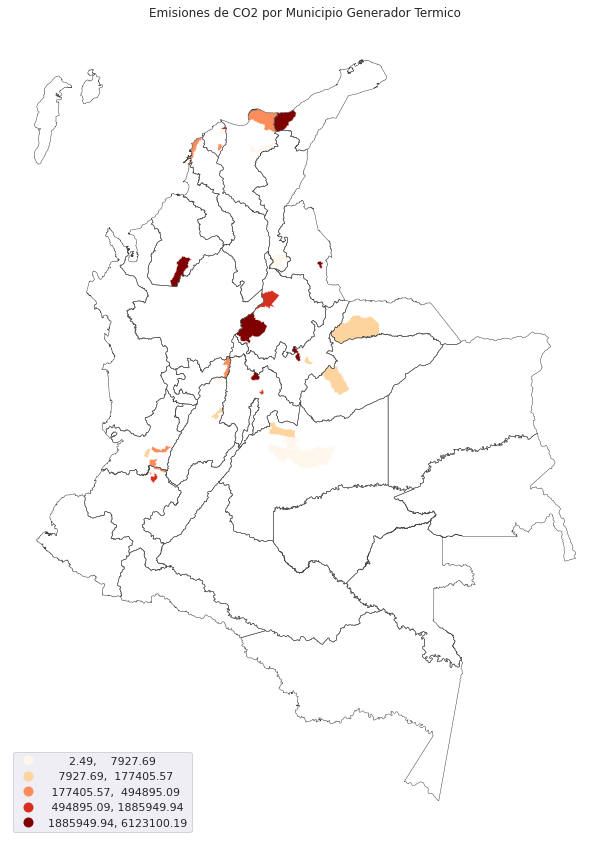

In [141]:
fig, ax = plt.subplots(1, figsize=(15, 15))       # Creamos la figura y el objeto Axes con Matplotlib.
ax.set_aspect('equal');                     
ax.set_axis_off();
ax.set_title('Emisiones de CO2 por Municipio Generador Termico')

df_geo_co2.plot(column="daily_emisiones_x",                    # Variable para representar en el mapa coroplético (área en kilómetros cuadrados).
             ax=ax,
             cmap='OrRd', linewidth=0.3,  
             scheme='quantiles', 
             legend=True,                         # Habilitamos la leyenda.
             legend_kwds={'loc': 'lower left'});  # Definimos la posición del recuadro de leyenda abajo a la izquierda.

col_deps.geometry.boundary.plot(linewidth=0.5, edgecolor='#444444', 
                                color=None, ax=ax);

# **5. Siguientes pasos en el proyecto**
---

Con base en el estudio de correlaciones, el siguiente paso a desarrollar en este proyecto, es un modelo de Machine Learning entrenado para predecir las emisiones de $CO_2$ a partir de las variables de operación del Sistema Interconectado Nacional.

# **Referencias**

1.   Informe Anual XM S.A. E.S.P. https://informeanual.xm.com.co/demo_3/pages/xm/21-capacidad-efectiva-neta.html
2.   https://www.portafolio.co/economia/con-48-termicas-se-reforzara-la-matriz-de-generacion-electrica-541424
3. https://www.xm.com.co/corporativo/Paginas/Nuestra-empresa/que-hacemos.aspx
4. http://unfccc.int/process/transparency-and-reporting/greenhouse-gas-data/greenhouse-gas-data-unfccc/global-warming-potentials

